# Supervised Learning - Foundations: ReCell 

***Marks: 60***

## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- new_price: Price of a new device of the same model in euros
- used_price: Price of the used/refurbished device in euros

## Importing necessary libraries and data

In [9]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ignore any warning
import warnings

warnings.filterwarnings("ignore")

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [10]:
# Read the data
data = pd.read_csv("used_device_data.csv")
data

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0         Honor  Android        14.50  yes   no            13.0   
1         Honor  Android        17.30  yes  yes            13.0   
2         Honor  Android        16.69  yes  yes            13.0   
3         Honor  Android        25.50  yes  yes            13.0   
4         Honor  Android        15.32  yes   no            13.0   
...         ...      ...          ...  ...  ...             ...   
3449       Asus  Android        15.34  yes   no             NaN   
3450       Asus  Android        15.24  yes   no            13.0   
3451    Alcatel  Android        15.80  yes   no            13.0   
3452    Alcatel  Android        15.80  yes   no            13.0   
3453    Alcatel  Android        12.83  yes   no            13.0   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0                  5.0        64.0  3.0   3020.0   146.0          2020   
1                 16.0       128.0  8.0   4300.0   213.0          2020   
2                  8.0       128.0  8.0   4200.0   213.0          2020   
3                  8.0        64.0  6.0   7250.0   480.0          2020   
4                  8.0        64.0  3.0   5000.0   185.0          2020   
...                ...         ...  ...      ...     ...           ...   
3449               8.0        64.0  6.0   5000.0   190.0          2019   
3450               8.0       128.0  8.0   4000.0   200.0          2018   
3451               5.0        32.0  3.0   4000.0   165.0          2020   
3452               5.0        32.0  2.0   4000.0   160.0          2020   
3453               5.0        16.0  2.0   4000.0   168.0          2020   

      days_used  new_price  used_price  
0           127     111.62       74.26  
1           325     249.39      174.53  
2           162     359.47      165.85  
3           345     278.93      169.93  
4           293     140.87       80.64  
...         ...        ...         ...  
3449        232     654.50       89.33  
3450        541     518.81      154.12  
3451        201      92.65       78.05  
3452        149     101.92       77.46  
3453        176      72.24       62.31  

[3454 rows x 15 columns]

<IPython.core.display.Javascript object>

#### Observations:

The DataFrame has 15 columns and 3454 rows as mentioned in the Data Dictionary. 

In [11]:
# Check the dimensionality of the DataFrame
data.shape

(3454, 15)

<IPython.core.display.Javascript object>

#### Observations:
Here we can see the dimensionality of the DataFrame.

In [15]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

brand_name       os  screen_size   4g  5g  main_camera_mp  \
866      Others  Android        15.24   no  no            8.00   
957      Celkon  Android        10.16   no  no            3.15   
280     Infinix  Android        15.39  yes  no             NaN   
2150       Oppo  Android        12.83  yes  no           13.00   
93           LG  Android        15.29  yes  no           13.00   
1040     Gionee  Android        12.83  yes  no           13.00   
3170        ZTE   Others        10.16   no  no            3.15   
2742       Sony  Android        12.70  yes  no           20.70   
102       Meizu  Android        15.29  yes  no             NaN   
1195        HTC  Android        10.29   no  no            8.00   

      selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
866                2.0        16.0  4.00   3000.0   206.0          2014   
957                0.3       512.0  0.25   1400.0   140.0          2013   
280                8.0        32.0  2.00   5000.0   185.0          2020   
2150              16.0        64.0  4.00   3200.0   148.0          2017   
93                 5.0        32.0  3.00   3500.0   179.0          2019   
1040               8.0        32.0  4.00   3150.0   166.0          2016   
3170               5.0        16.0  4.00   1400.0   125.0          2014   
2742               2.0        16.0  4.00   3000.0   170.0          2013   
102               20.0       128.0  6.00   3600.0   165.0          2019   
1195               2.0        32.0  4.00   2000.0   146.0          2015   

      days_used  new_price  used_price  
866         632     179.61       56.76  
957         637      48.65       16.45  
280         329      88.88       79.10  
2150        648     281.30      107.54  
93          216     200.42       91.62  
1040        970     279.87      104.13  
3170       1007      69.71       43.14  
2742       1060     330.24       83.33  
102         332     420.17      142.51  
1195        892     131.50       68.57

<IPython.core.display.Javascript object>

#### Observations:
Here we can see the random sample of the Data

In [16]:
# let's create a copy of the data to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

#### Observations:
Here we create a copy of the data to avoid any changes to original data

In [17]:
# checking the column names and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   object 
 1   os                3454 non-null   object 
 2   screen_size       3454 non-null   float64
 3   4g                3454 non-null   object 
 4   5g                3454 non-null   object 
 5   main_camera_mp    3275 non-null   float64
 6   selfie_camera_mp  3452 non-null   float64
 7   int_memory        3450 non-null   float64
 8   ram               3450 non-null   float64
 9   battery           3448 non-null   float64
 10  weight            3447 non-null   float64
 11  release_year      3454 non-null   int64  
 12  days_used         3454 non-null   int64  
 13  new_price         3454 non-null   float64
 14  used_price        3454 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 404.9+ KB


<IPython.core.display.Javascript object>

#### Observations:
* There are columns of different types in the DataFrame. 
* brand_name,os,4g,5g are object datatype columns.
* release_year,days_used are int data type. 
* Total memory of Dataframe is 404.9+ KB

In [18]:
# Check the missing values
df.isnull().sum().sort_values(ascending=False)

main_camera_mp      179
weight                7
battery               6
int_memory            4
ram                   4
selfie_camera_mp      2
brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
In the Dataframe there are 179 missing values in main_camera_mp column and 7,6,4,4,2 in weight,battery,int_memory,ram,selfie_camera_mp respectively.

In [19]:
# check total number of missing in the data
df.isnull().sum().sum()

202

<IPython.core.display.Javascript object>

#### Observations:
In the Dataframe there are total 202 missing values are present.

In [20]:
# get the statistical summary of the numerical variables
df.describe(include="all").T

count unique      top  freq         mean          std  \
brand_name          3454     34   Others   502          NaN          NaN   
os                  3454      4  Android  3214          NaN          NaN   
screen_size       3454.0    NaN      NaN   NaN    13.713115      3.80528   
4g                  3454      2      yes  2335          NaN          NaN   
5g                  3454      2       no  3302          NaN          NaN   
main_camera_mp    3275.0    NaN      NaN   NaN     9.460208     4.815461   
selfie_camera_mp  3452.0    NaN      NaN   NaN     6.554229     6.970372   
int_memory        3450.0    NaN      NaN   NaN    54.573099    84.972371   
ram               3450.0    NaN      NaN   NaN     4.036122     1.365105   
battery           3448.0    NaN      NaN   NaN  3133.402697  1299.682844   
weight            3447.0    NaN      NaN   NaN   182.751871    88.413228   
release_year      3454.0    NaN      NaN   NaN  2015.965258     2.298455   
days_used         3454.0    NaN      NaN   NaN   674.869716   248.580166   
new_price         3454.0    NaN      NaN   NaN   237.038848   194.302782   
used_price        3454.0    NaN      NaN   NaN    92.302936    54.701648   

                     min       25%      50%      75%     max  
brand_name           NaN       NaN      NaN      NaN     NaN  
os                   NaN       NaN      NaN      NaN     NaN  
screen_size         5.08      12.7    12.83    15.34   30.71  
4g                   NaN       NaN      NaN      NaN     NaN  
5g                   NaN       NaN      NaN      NaN     NaN  
main_camera_mp      0.08       5.0      8.0     13.0    48.0  
selfie_camera_mp     0.0       2.0      5.0      8.0    32.0  
int_memory          0.01      16.0     32.0     64.0  1024.0  
ram                 0.02       4.0      4.0      4.0    12.0  
battery            500.0    2100.0   3000.0   4000.0  9720.0  
weight              69.0     142.0    160.0    185.0   855.0  
release_year      2013.0    2014.0   2015.5   2018.0  2020.0  
days_used           91.0     533.5    690.5   868.75  1094.0  
new_price           18.2  120.3425  189.785  291.115  2560.2  
used_price          4.65   56.4825    81.87  116.245  749.52

<IPython.core.display.Javascript object>

#### Observations:
- There are 34 cell phone brands in the dataset
- There are 4 operating systems
- The price for used phone ranges from 4.65 - 749.52 and average price of 92.30
- The price for new phone ranges from 18.2 - 2560.2 with the average price of 237.03

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. Budget devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the price of a used device?

### Univariate Analysis

In [22]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 8), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

#### used_price

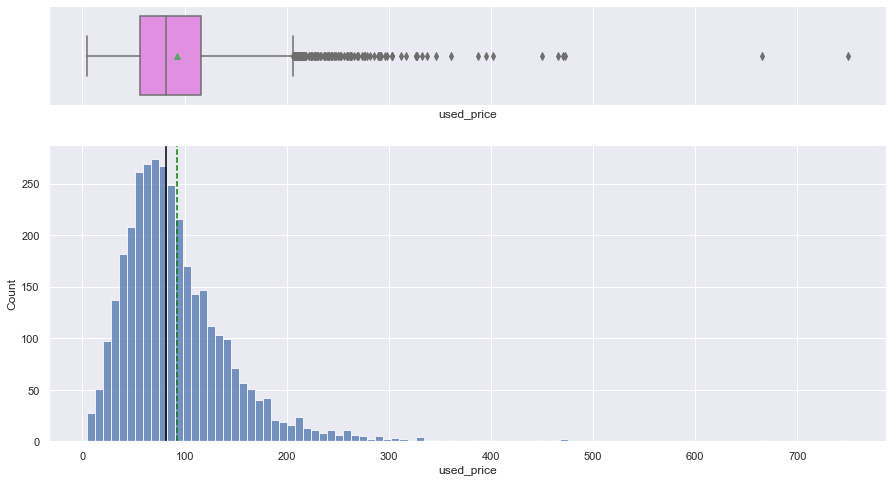

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(df, "used_price")

#### Observations:
The dependent variable ('used_price') is right skewed with mean of 92.30 and has outliers. This would be addressed later on during the preprocessing stage

In [24]:
# confirm skewness
df.used_price.skew()

2.3167183592455696

<IPython.core.display.Javascript object>

In [26]:
df["used_price_log"] = np.log(df["used_price"])

<IPython.core.display.Javascript object>

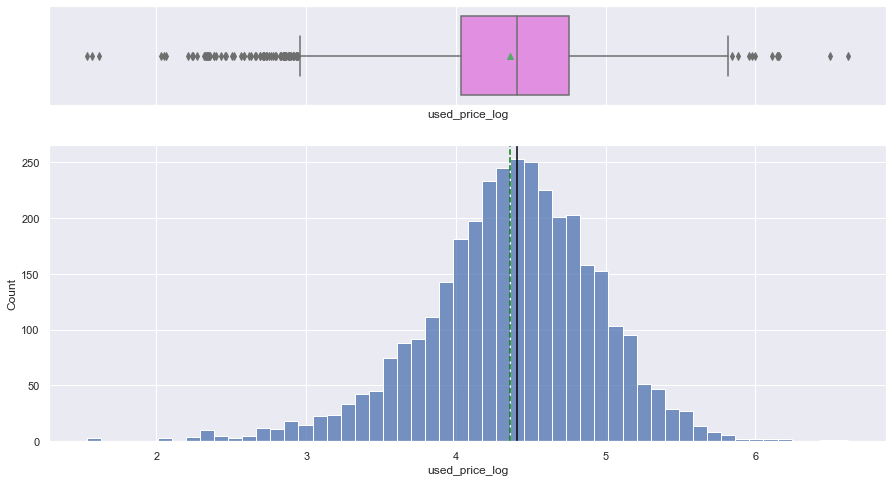

<IPython.core.display.Javascript object>

In [27]:
histogram_boxplot(df, "used_price_log")

#### new_price

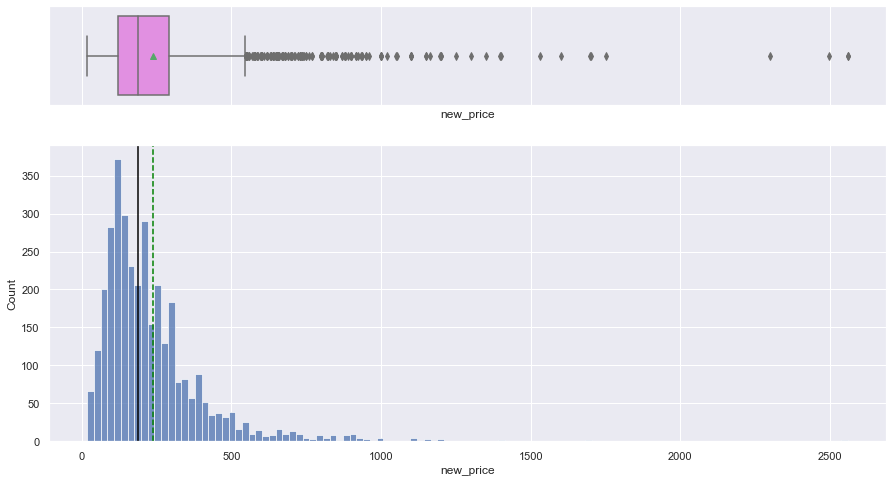

<IPython.core.display.Javascript object>

In [28]:
histogram_boxplot(df, "new_price")

In [29]:
df["new_price_log"] = np.log(df["new_price"])

<IPython.core.display.Javascript object>

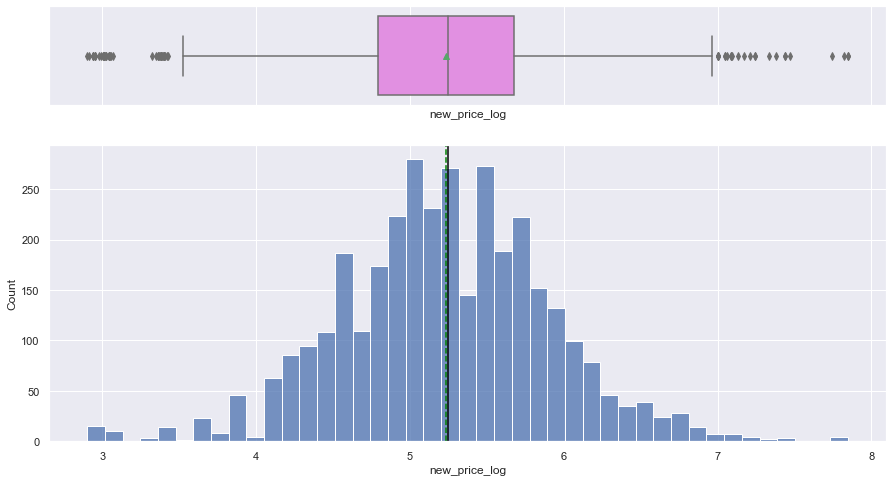

<IPython.core.display.Javascript object>

In [30]:
histogram_boxplot(df, "new_price_log")

#### screen_size

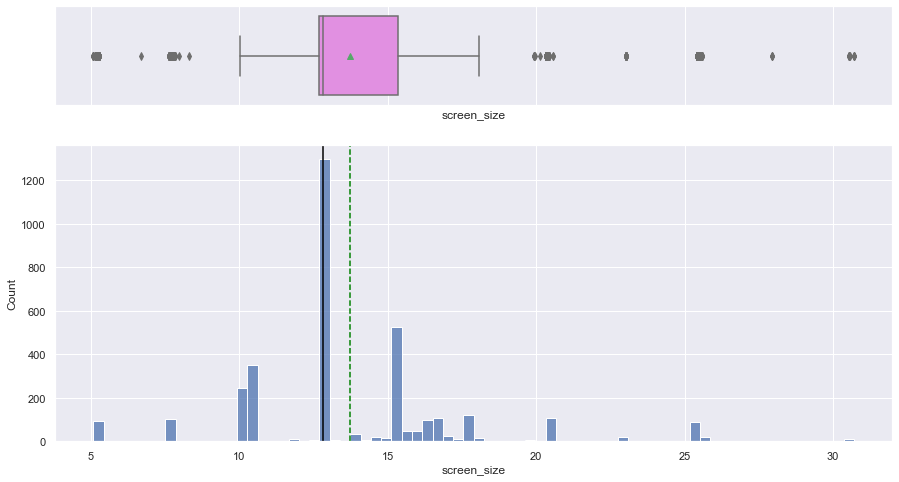

<IPython.core.display.Javascript object>

In [31]:
histogram_boxplot(df, "screen_size")

#### main_camera_mp

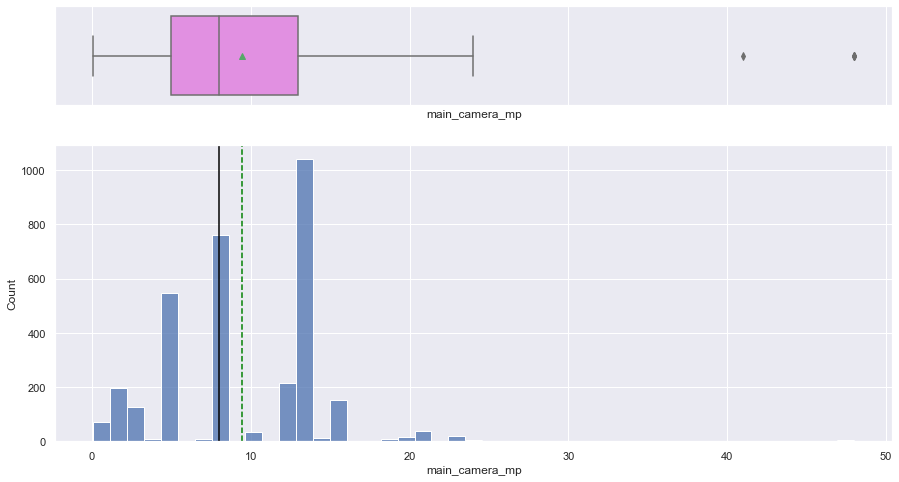

<IPython.core.display.Javascript object>

In [32]:
histogram_boxplot(df, "main_camera_mp")

#### selfie_camera_mp

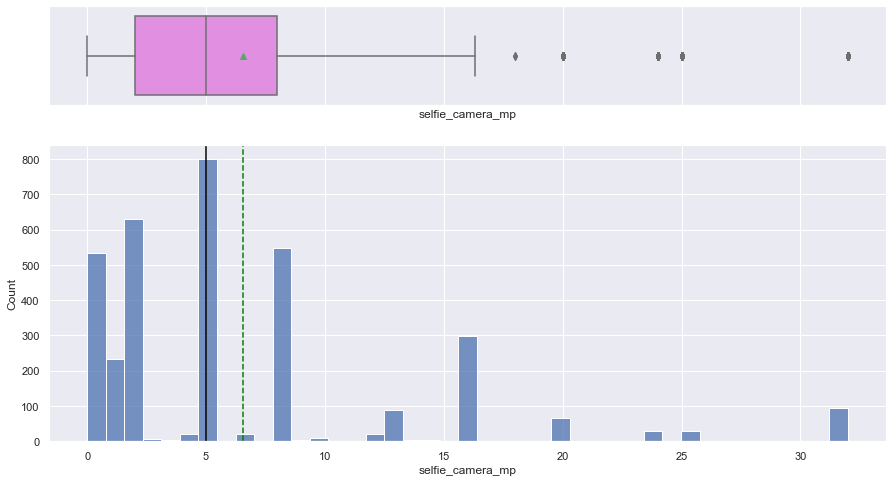

<IPython.core.display.Javascript object>

In [33]:
histogram_boxplot(df, "selfie_camera_mp")

#### int_memory

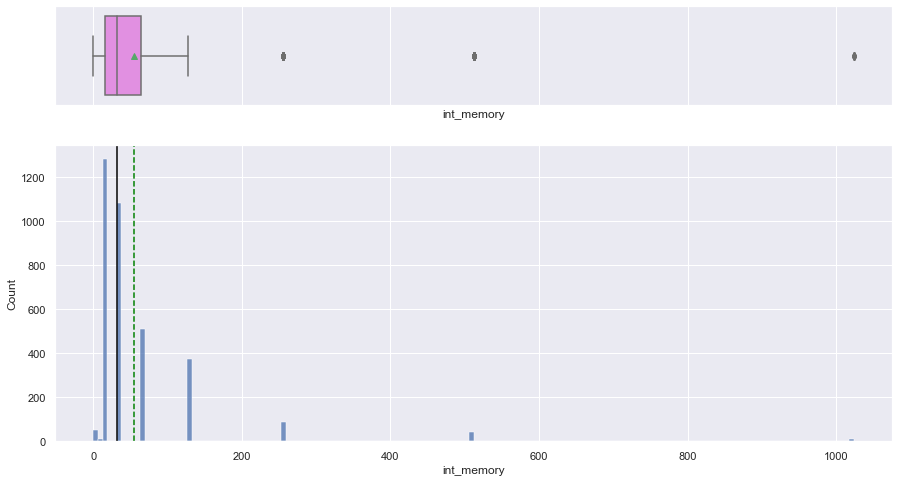

<IPython.core.display.Javascript object>

In [34]:
histogram_boxplot(df, "int_memory")

#### ram

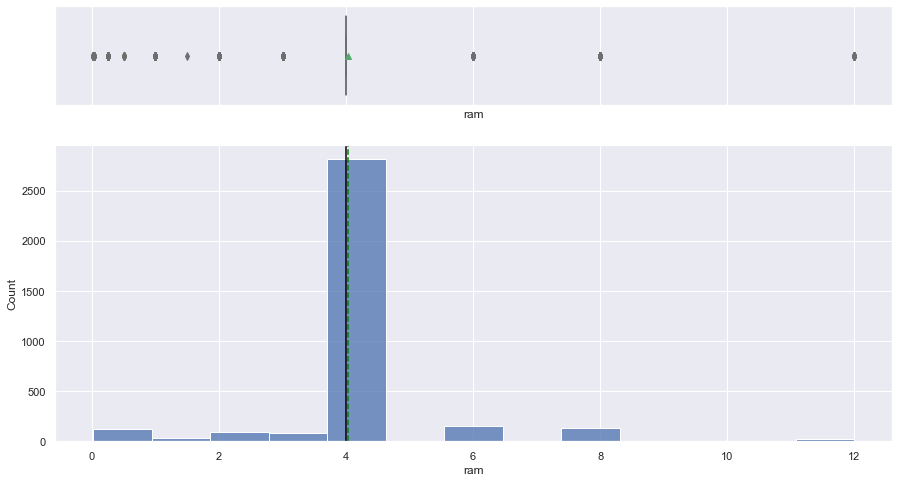

<IPython.core.display.Javascript object>

In [35]:
histogram_boxplot(df, "ram")

#### weight

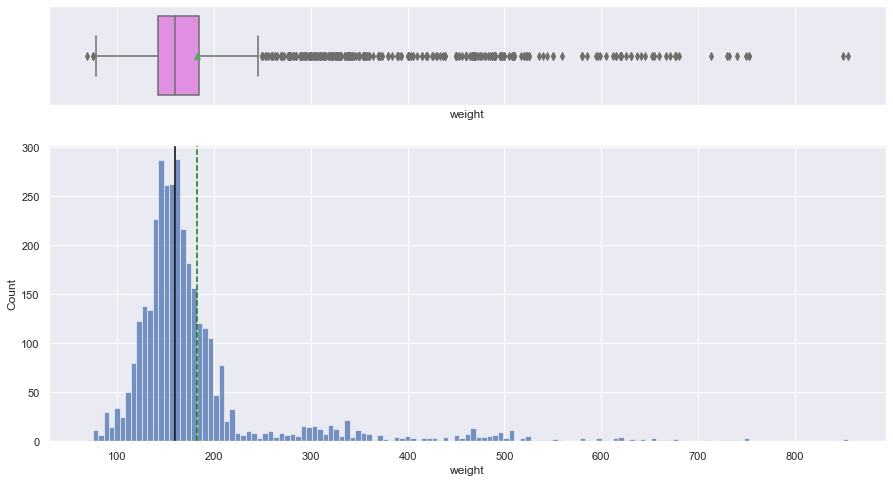

<IPython.core.display.Javascript object>

In [36]:
histogram_boxplot(df, "weight")

#### battery

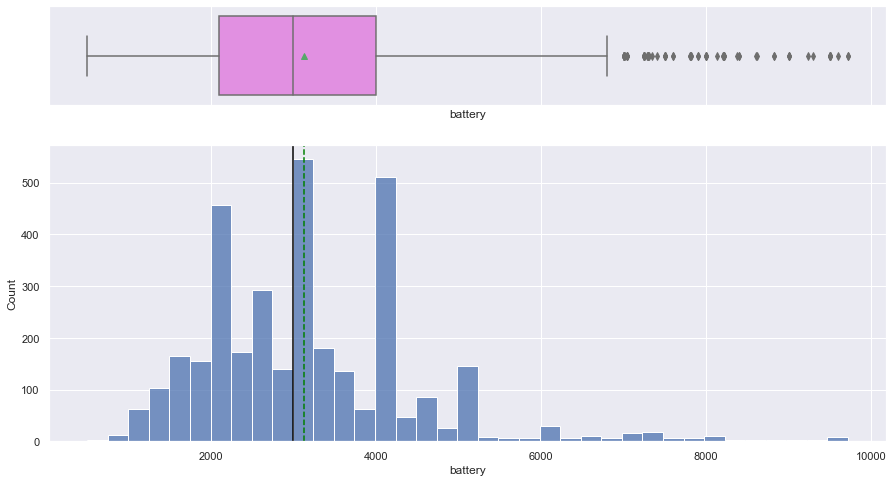

<IPython.core.display.Javascript object>

In [37]:
histogram_boxplot(df, "battery")

#### days_used

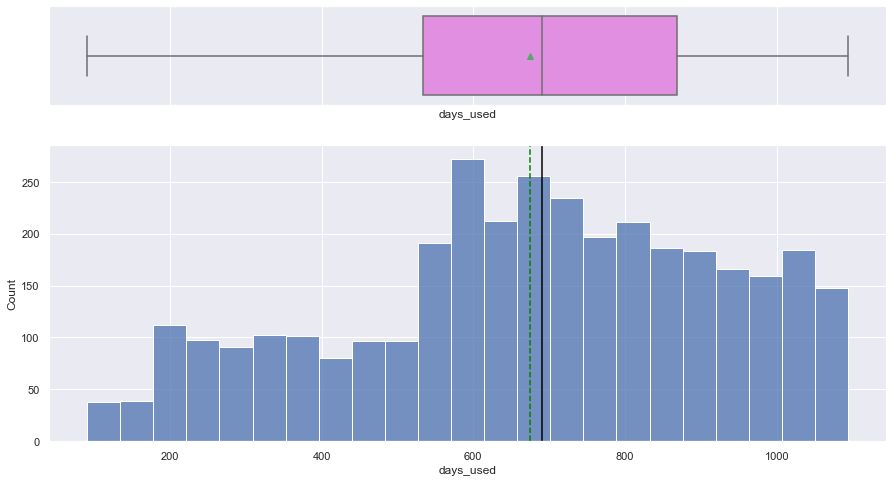

<IPython.core.display.Javascript object>

In [38]:
histogram_boxplot(df, "days_used")

#### Observations:
The distributions of the other variables are not normal or uniform

In [39]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

#### brand_name

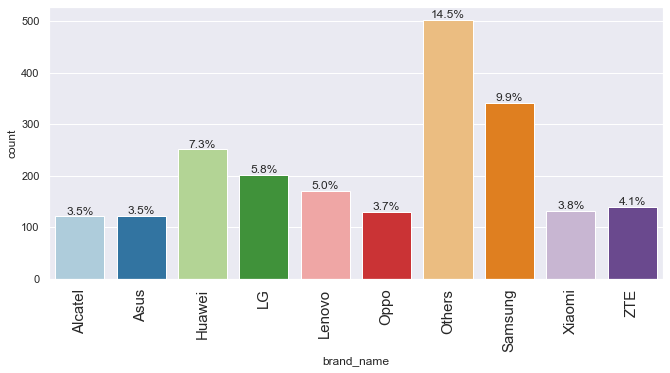

<IPython.core.display.Javascript object>

In [40]:
labeled_barplot(df, "brand_name", perc=True, n=10)

#### os

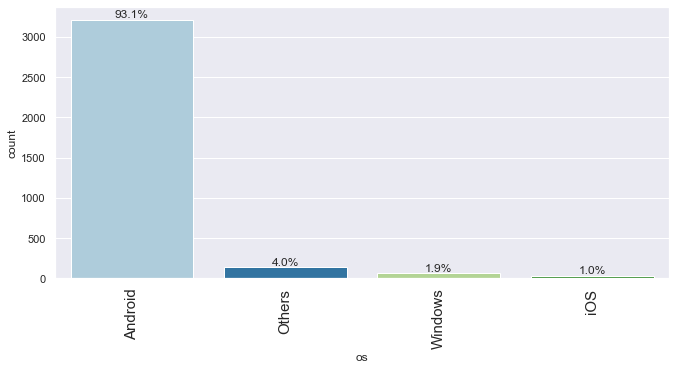

<IPython.core.display.Javascript object>

In [41]:
labeled_barplot(df, "os", perc=True, n=10)

#### 4g

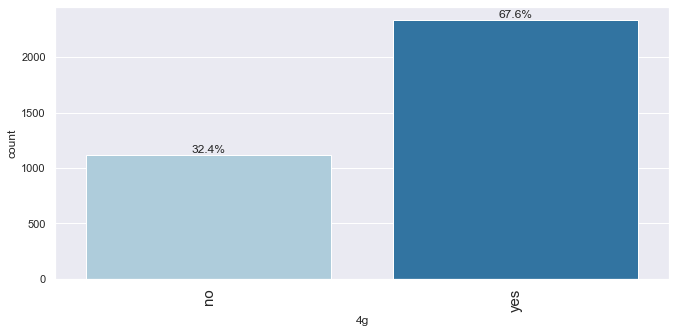

<IPython.core.display.Javascript object>

In [42]:
labeled_barplot(df, "4g", perc=True, n=10)

#### 5g

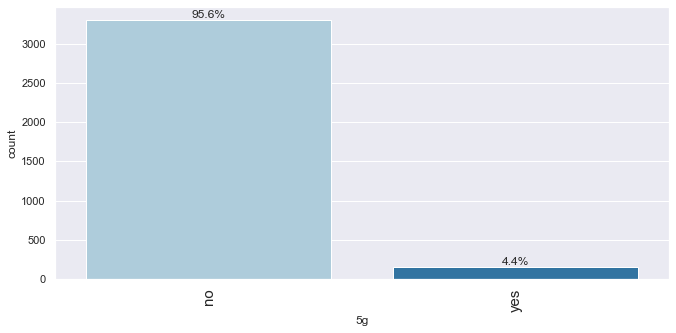

<IPython.core.display.Javascript object>

In [43]:
labeled_barplot(df, "5g", perc=True, n=10)

#### release_year

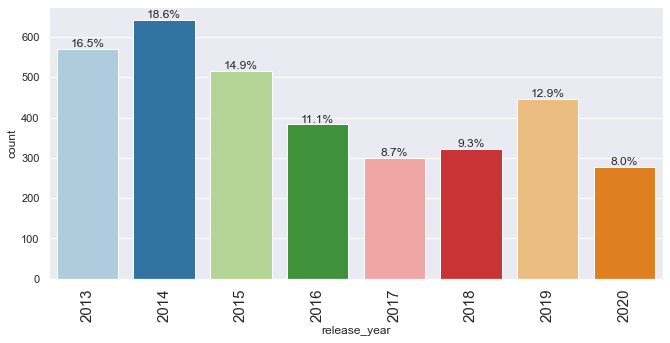

<IPython.core.display.Javascript object>

In [44]:
labeled_barplot(df, "release_year", perc=True, n=10)

### Bivariate Analysis

In [45]:
# split the data into different OS group
phone_by_os = df.groupby("os")

<IPython.core.display.Javascript object>

In [46]:
# Perform a basic stats of the prices for comparison.
phone_by_os["used_price", "new_price"].describe().T

os                    Android      Others     Windows          iOS
used_price count  3214.000000  137.000000   67.000000    36.000000
           mean     94.224664   38.282044   72.353731   163.442500
           std      53.057530   44.133531   40.473309    91.628612
           min       4.820000    4.650000   26.480000    48.410000
           25%      59.385000   15.160000   42.940000    97.977500
           50%      83.440000   26.670000   56.460000   138.420000
           75%     117.710000   48.210000   91.530000   213.420000
           max     749.520000  346.330000  227.660000   472.940000
new_price  count  3214.000000  137.000000   67.000000    36.000000
           mean    240.165389   86.561825  191.430448   615.439167
           std     190.310543  121.357767  121.202627   272.247586
           min      30.810000   18.200000   59.720000   270.810000
           25%     128.635000   29.560000   99.485000   361.920000
           50%     198.500000   58.790000  159.920000   543.790000
           75%     291.717500   91.590000  269.235000   842.867500
           max    2560.200000  999.580000  699.460000  1250.320000

<IPython.core.display.Javascript object>

#### observations:
Android has the highest price for both used and new prices. It is also the most frequent group

In [47]:
# Percentage of the used phone market by os
df.os.value_counts() / len(df)

Android    0.930515
Others     0.039664
Windows    0.019398
iOS        0.010423
Name: os, dtype: float64

<IPython.core.display.Javascript object>

#### observations:
Andriod devices dominate with approximately 93% of the dataset.

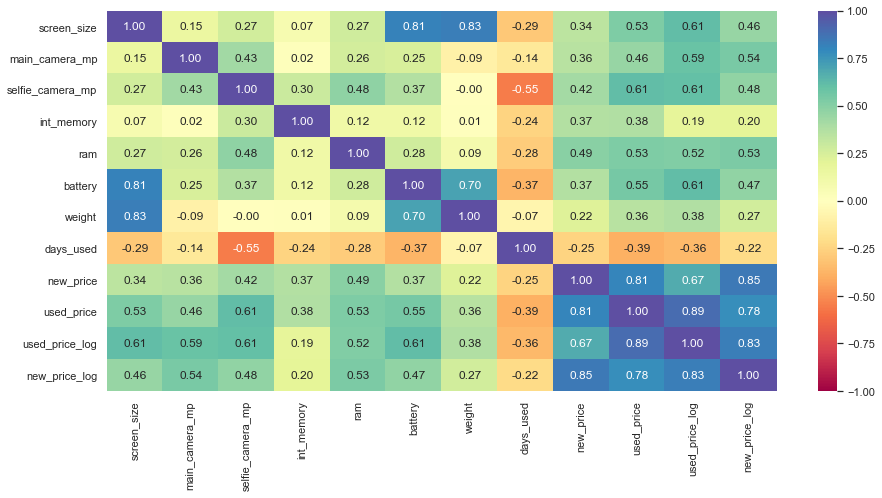

<IPython.core.display.Javascript object>

In [48]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

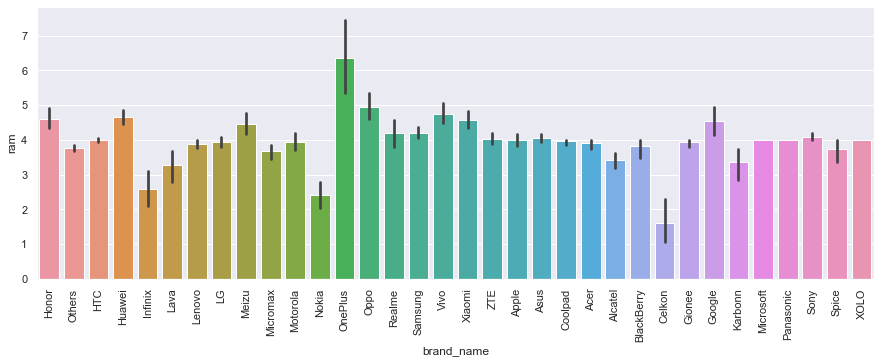

<IPython.core.display.Javascript object>

In [49]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

#### Observations:
One plus has the highest ram while Celkon has the least ram amongst the brand.

**People who travel frequently require devices with large batteries to run through the day. But large battery often increases a device's weight, making it feel uncomfortable in the hands. Let's create a new dataframe of only those devices which offer a large battery and analyze.**

In [50]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 17)

<IPython.core.display.Javascript object>

<Figure size 1080x720 with 0 Axes>

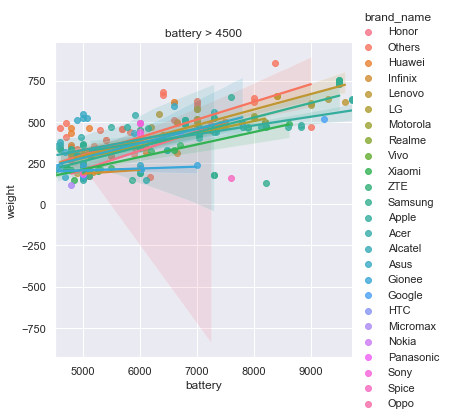

<IPython.core.display.Javascript object>

In [51]:
L_Bat = df.loc[df["battery"] > 4500]
plt.figure(figsize=(15, 10))
sns.set_style("darkgrid")
WB = sns.lmplot(x="battery", y="weight", hue="brand_name", data=L_Bat)
ax1 = WB.axes
ax1 = plt.gca()
ax1.set_title("battery > 4500")
plt.show()

#### Observations:
from the scatterplot, large battery corresponds to high weight for some brands. An outliers looks to be present as well

In [52]:
df_large_battery.groupby("brand_name")["weight"].mean().sort_values(ascending=True)

brand_name
Micromax     118.000000
Spice        158.000000
Panasonic    182.000000
Infinix      193.000000
Oppo         195.000000
ZTE          195.400000
Vivo         195.630769
Realme       196.833333
Motorola     200.757143
Gionee       209.430000
Xiaomi       231.500000
Honor        248.714286
Asus         313.772727
Nokia        318.000000
Acer         360.000000
LG           366.058333
Alcatel      380.000000
Others       390.546341
Huawei       394.486486
Samsung      398.352000
HTC          425.000000
Sony         439.500000
Apple        439.558824
Lenovo       442.721429
Google       517.000000
Name: weight, dtype: float64

<IPython.core.display.Javascript object>

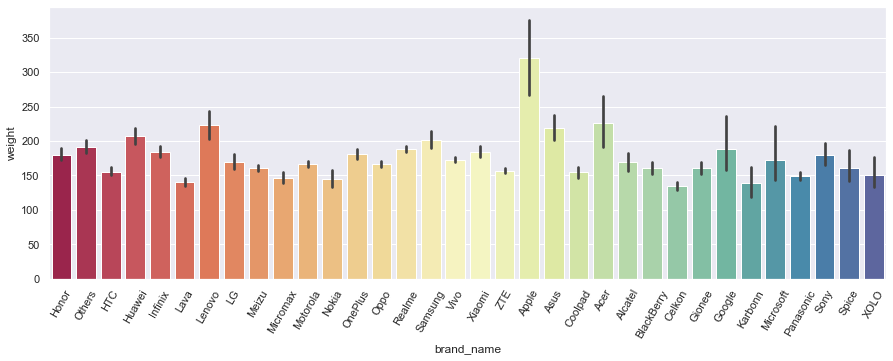

<IPython.core.display.Javascript object>

In [53]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="brand_name", y="weight", palette="Spectral")
plt.xticks(rotation=60)
plt.show()

#### Observations:
The apple phone is the most weight compare to others

In [54]:
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 17)

<IPython.core.display.Javascript object>

In [55]:
df_large_screen.brand_name.value_counts()

Huawei       149
Samsung      119
Others        99
Vivo          80
Honor         72
Oppo          70
Xiaomi        69
Lenovo        69
LG            59
Motorola      42
Asus          41
Realme        40
Alcatel       26
Apple         24
Acer          19
ZTE           17
Meizu         17
OnePlus       16
Nokia         15
Sony          12
Infinix       10
Micromax       7
HTC            7
Google         4
XOLO           3
Coolpad        3
Gionee         3
Panasonic      2
Karbonn        2
Spice          2
Microsoft      1
Name: brand_name, dtype: int64

<IPython.core.display.Javascript object>

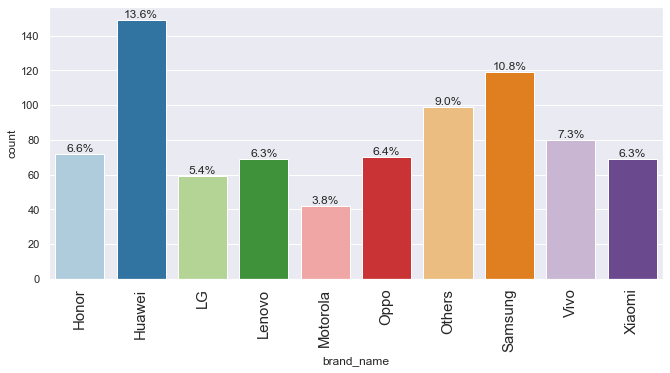

<IPython.core.display.Javascript object>

In [56]:
labeled_barplot(df_large_screen, "brand_name", perc=True, n=10)

#### Observations:
Huawei has the most count of phones with large screen size 

#### Multivariate analysis

<AxesSubplot:>

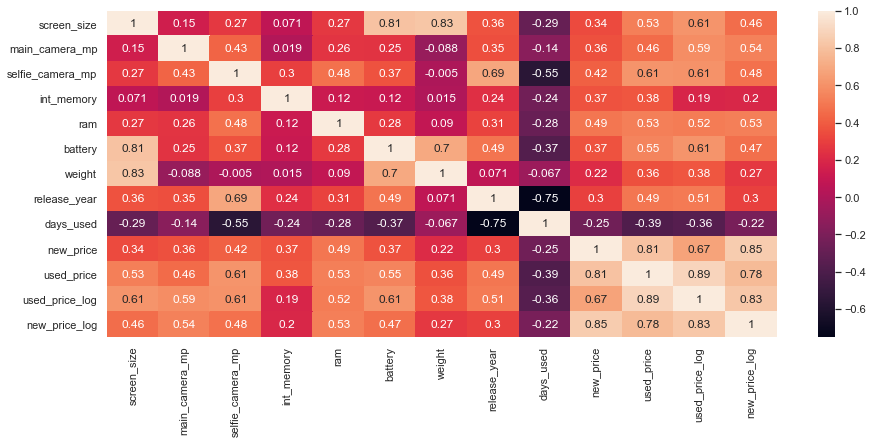

<IPython.core.display.Javascript object>

In [57]:
# correlation with used phone prices
plt.figure(figsize=(15, 6))
sns.heatmap(df.corr(), annot=True)

#### Observations:
new price, ram and selfie camera mp are attributes that show more 0.5 correlation to used price.

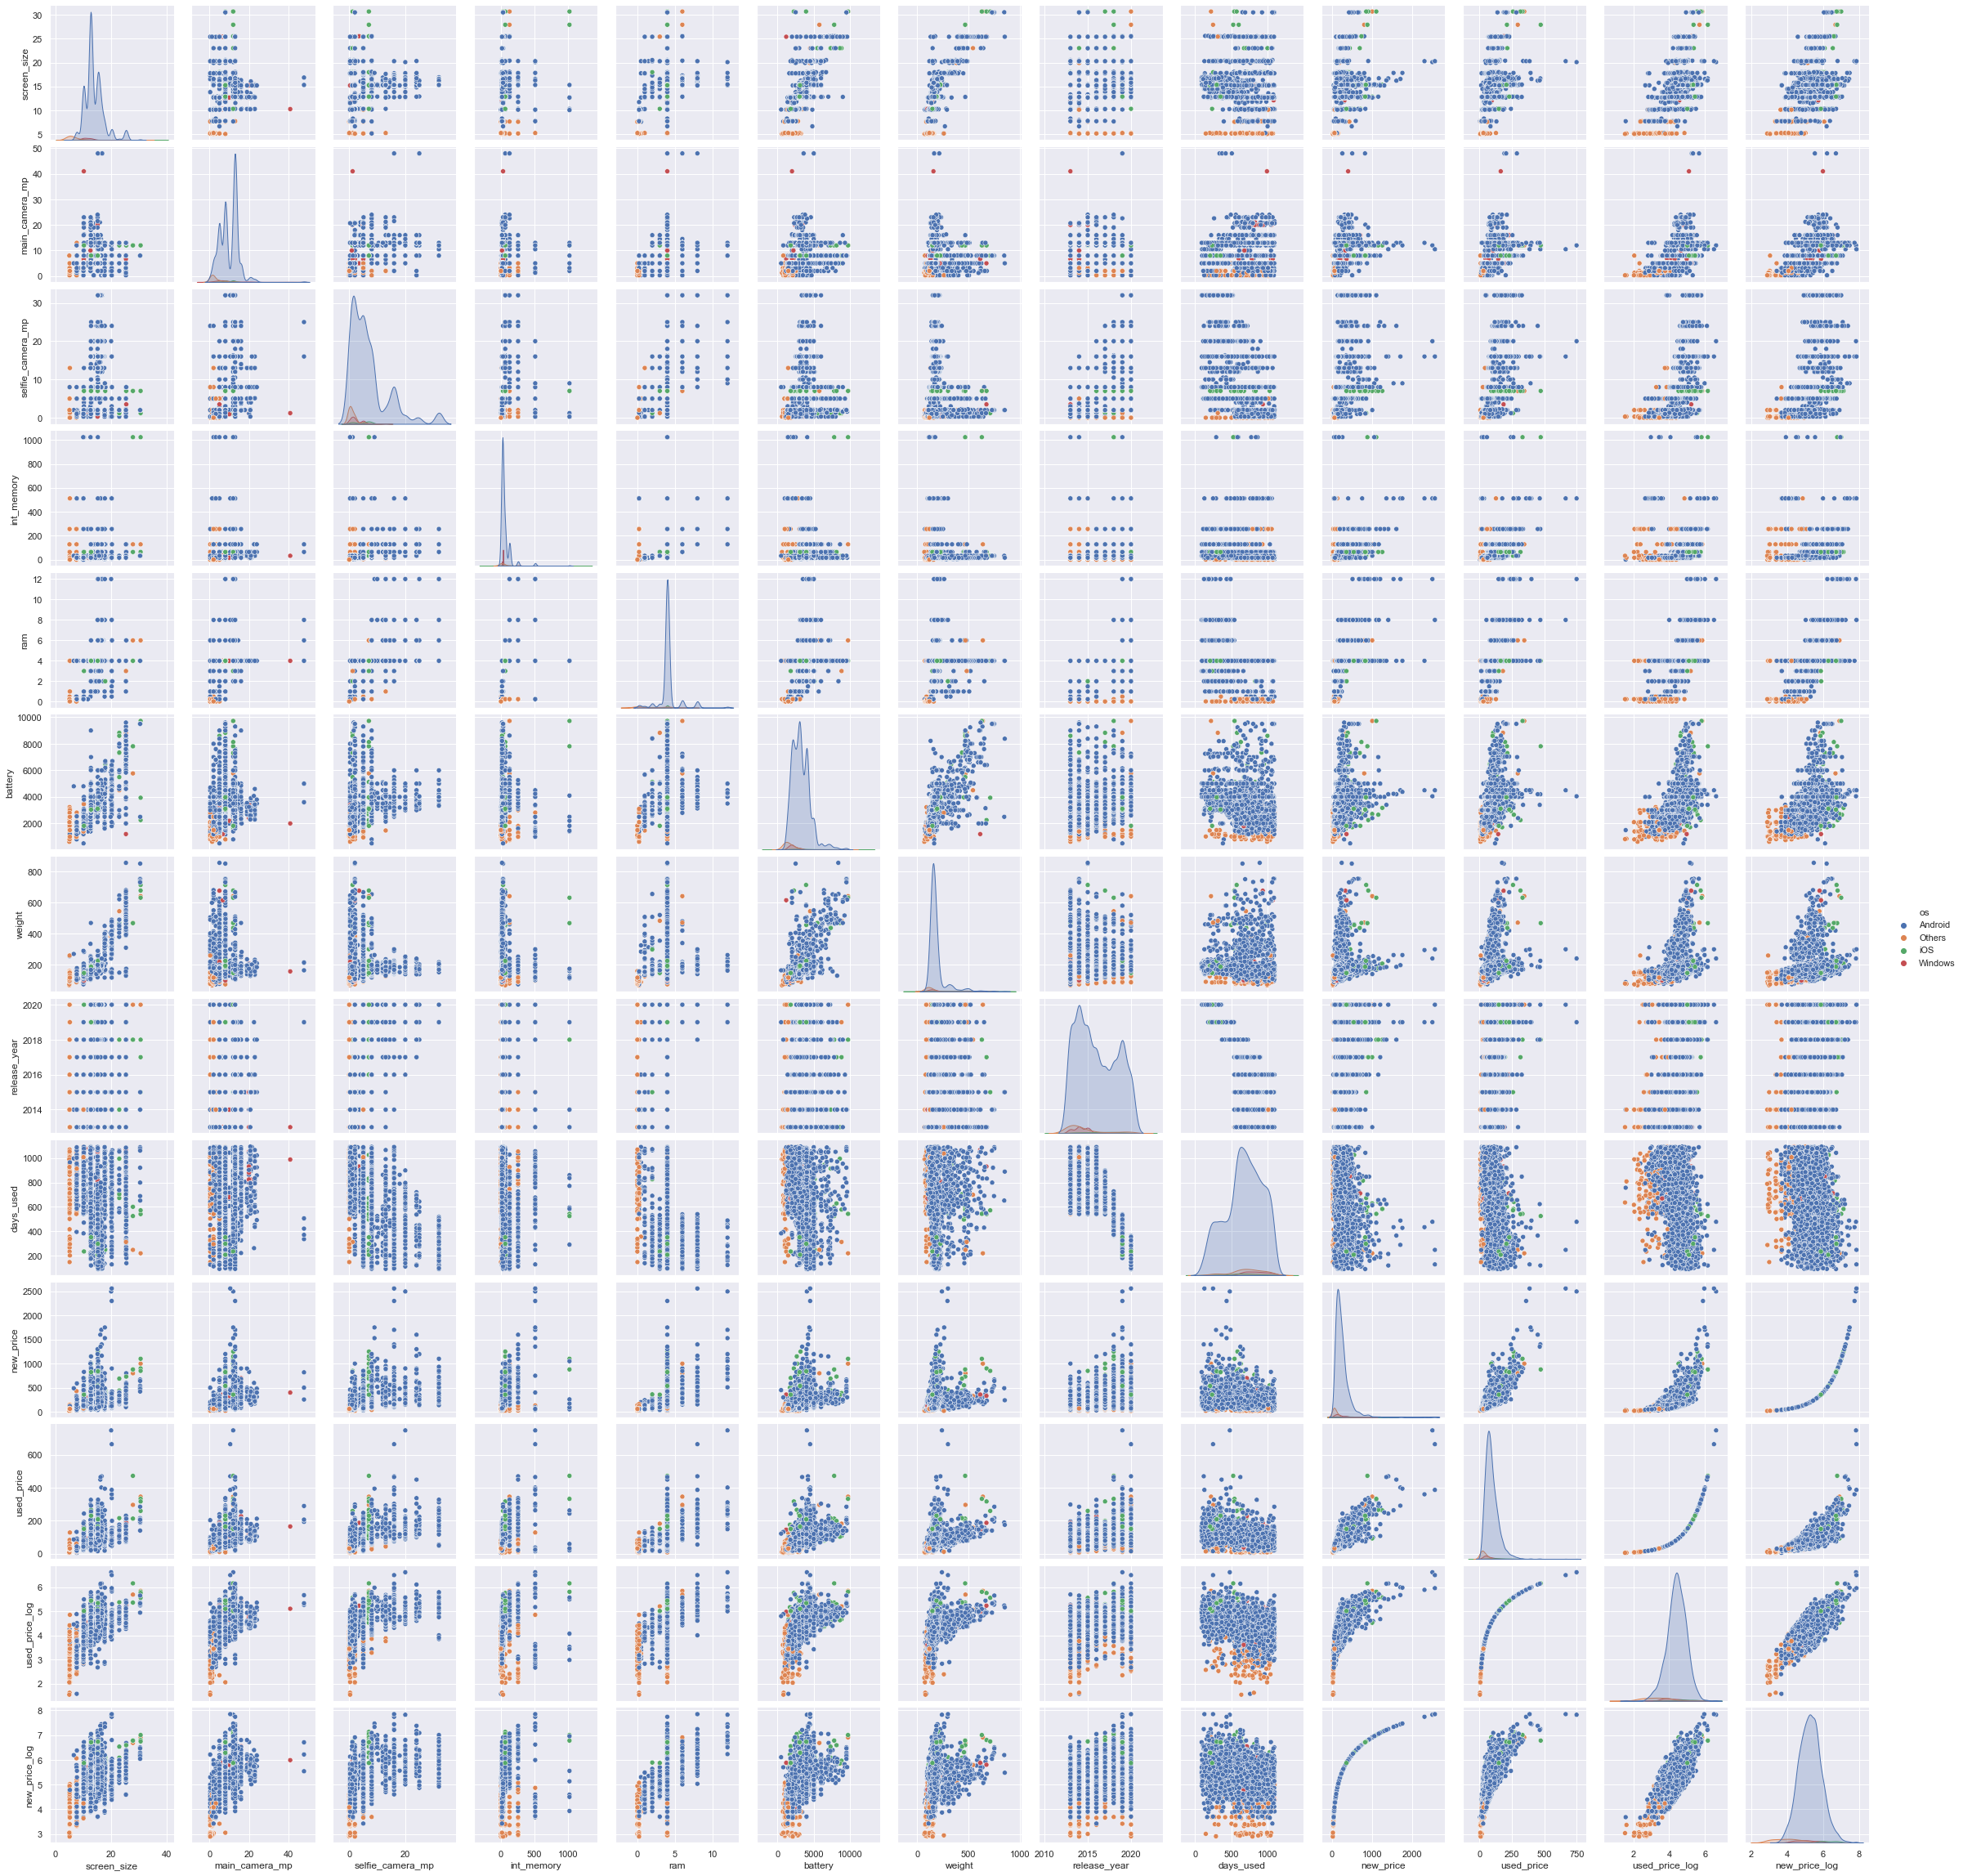

<IPython.core.display.Javascript object>

In [59]:
sns.pairplot(df,hue='os')


#### Observations:
The pairplot shows that new price and old price have the most obvious linear relationship.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

#### Missing value treatment

In [60]:
df1 = df.copy()

<IPython.core.display.Javascript object>

In [61]:
df1.isnull().sum().sort_values(ascending=False)

main_camera_mp      179
weight                7
battery               6
ram                   4
int_memory            4
selfie_camera_mp      2
release_year          0
used_price_log        0
used_price            0
new_price             0
days_used             0
brand_name            0
os                    0
5g                    0
4g                    0
screen_size           0
new_price_log         0
dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:title={'center':'Brands with most data'}, xlabel='brand_name'>

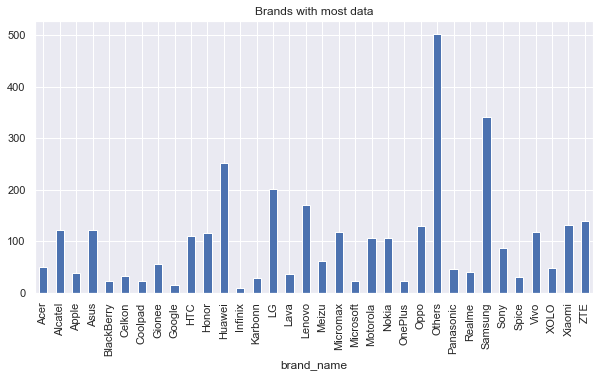

<IPython.core.display.Javascript object>

In [64]:
# find the brand with the most missing data
df1.groupby(["brand_name"]).size().plot(
    kind="bar", title="Brands with most data", figsize=(10, 5)
)

#### Observations:
Others has the most avaliable information in the dataset, followed by samsung The following columns have missing values :
-(main_camera_mp),
-(int_memory),
-(ram),
-(weight),
_(battery),
_(selfie_camera_mp)

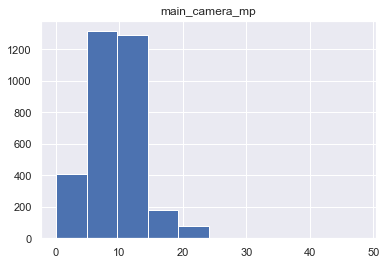

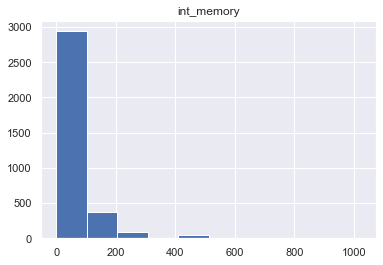

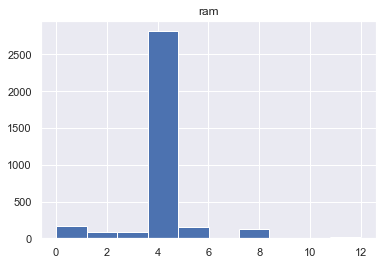

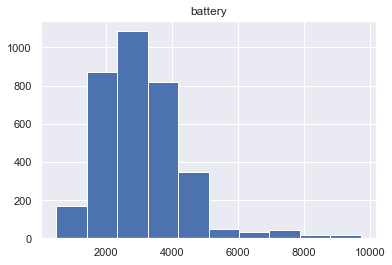

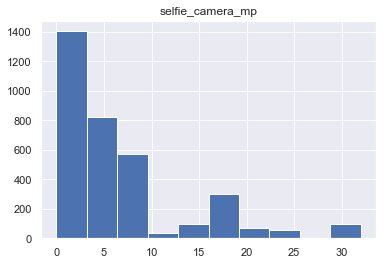

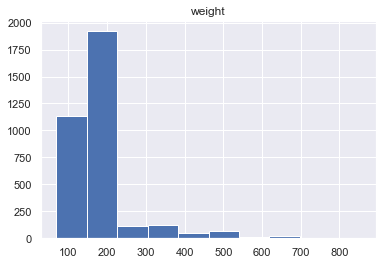

<IPython.core.display.Javascript object>

In [65]:
cols_to_plot = [
    "main_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "selfie_camera_mp",
    "weight",
]
for colname in cols_to_plot:
    plt.hist(df1[colname])
    plt.title(colname)
    plt.show()

In [66]:
num_missing = df1.isnull().sum(axis=1)
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print(f"For the rows with exactly {n} missing values, Nan are found in:")
        n_miss_per_col = df1[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print("\n\n")

For the rows with exactly 1 missing values, Nan are found in:
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   3
battery               5
weight                7
dtype: int64



For the rows with exactly 2 missing values, Nan are found in:
ram        1
battery    1
dtype: int64





<IPython.core.display.Javascript object>

#### Observations:
Since not alot of the rows have missing values in alot of columns, no rows would be dropped

In [67]:
# for selfie_camera_mp with only 2 missing values, forward fill will be used.
df1["selfie_camera_mp"].fillna(method="ffill", inplace=True)
df1["selfie_camera_mp"].isnull().sum()

0

<IPython.core.display.Javascript object>

In [68]:
# use median for ram
df1["ram"].fillna(df1["ram"].median(), inplace=True)
df1["ram"].isnull().sum()

0

<IPython.core.display.Javascript object>

In [69]:
# use median for battery due to skewness
df1["battery"].fillna(df1["battery"].median(), inplace=True)
df1["battery"].isnull().sum()

0

<IPython.core.display.Javascript object>

In [70]:
# use median for weight
df1["weight"].fillna(df1["weight"].median(), inplace=True)
df1["weight"].isnull().sum()

0

<IPython.core.display.Javascript object>

### Feature Engineering
Outlier detection and treatment (if needed)

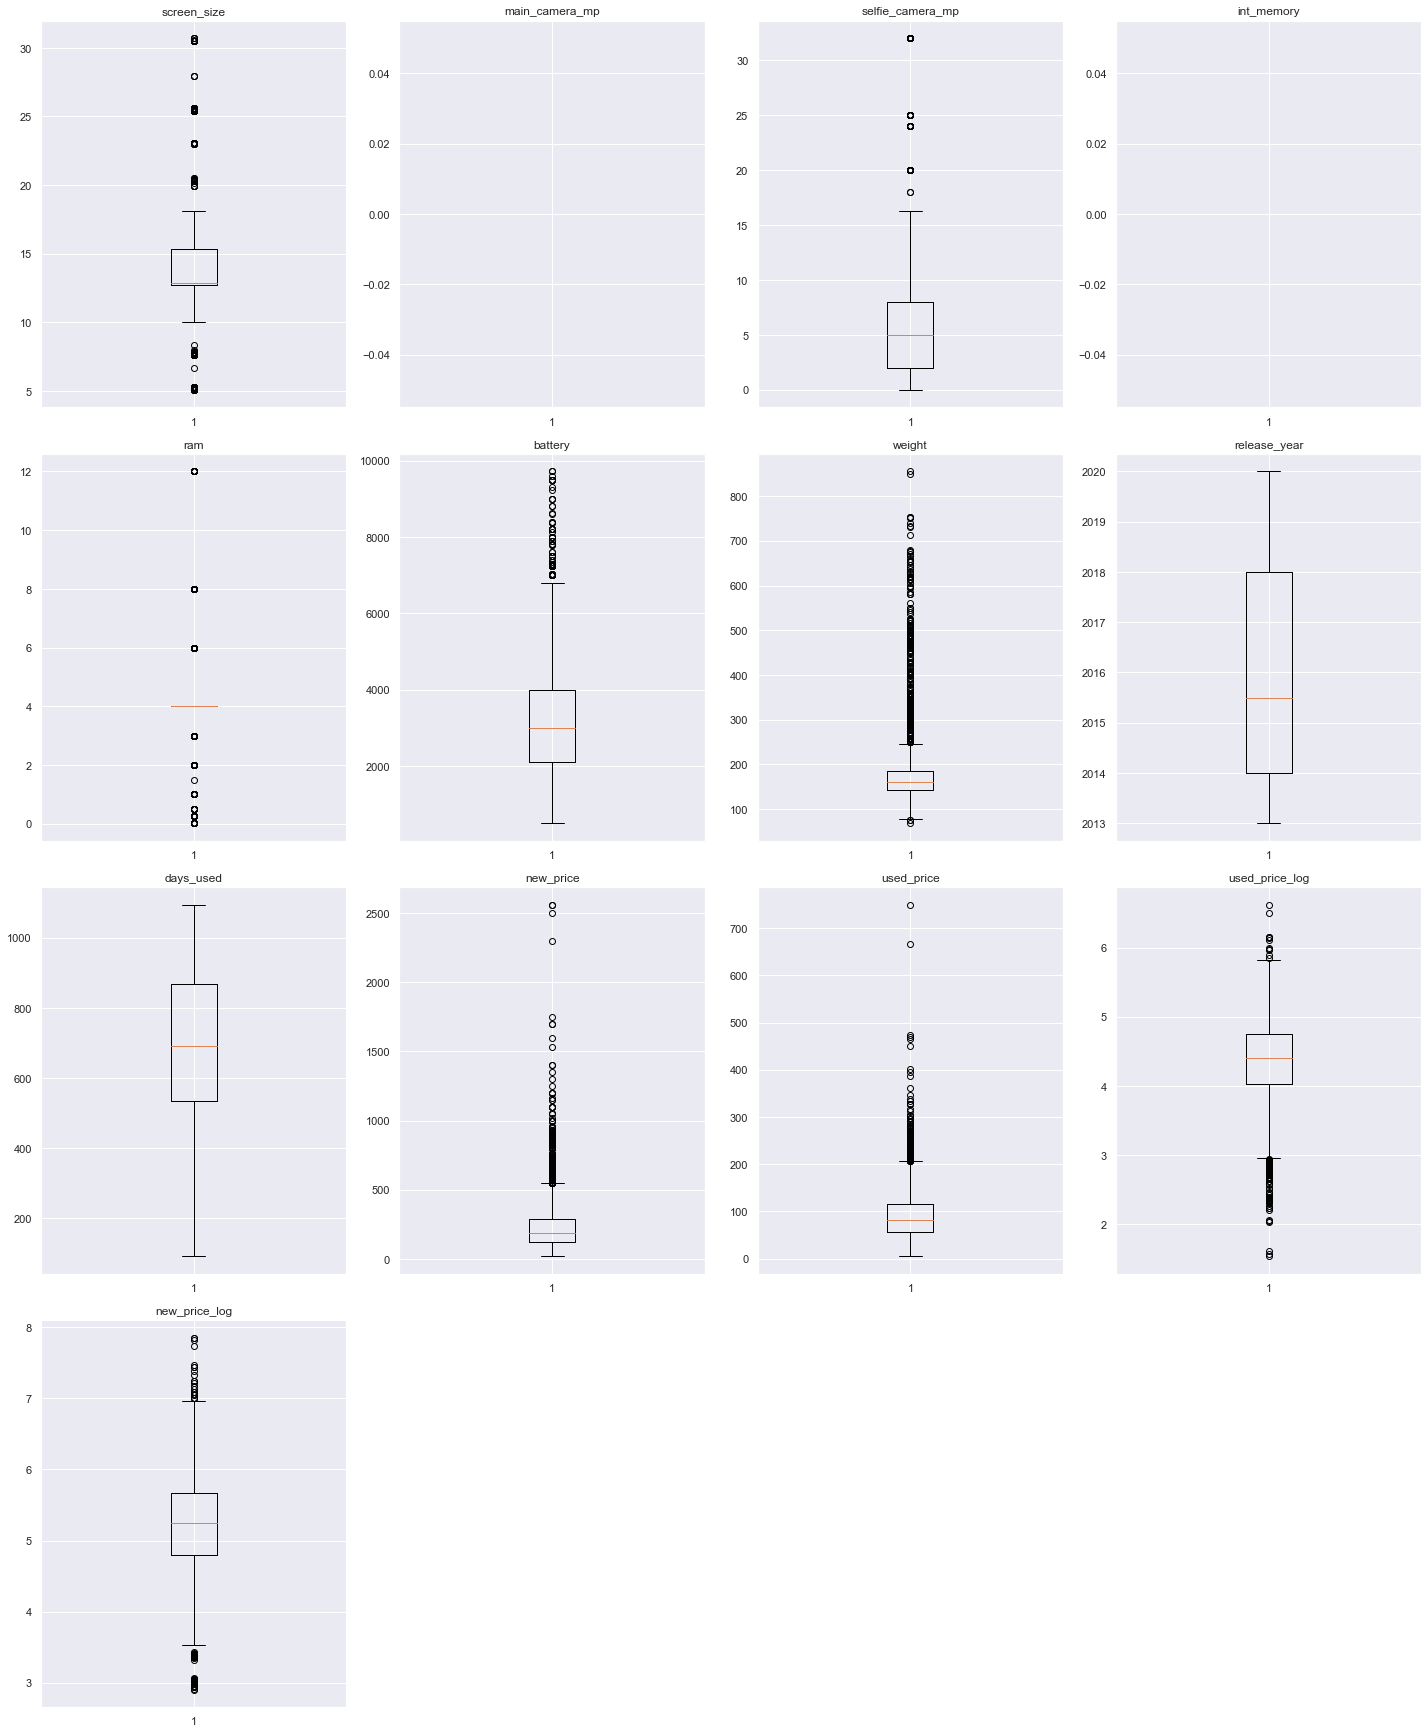

<IPython.core.display.Javascript object>

In [71]:
# plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 30))
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()
for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

In [72]:
# Outliers are present in the column so we check for sensitivity
quartiles = np.quantile(
    df1["main_camera_mp"][df1["main_camera_mp"].notnull()], [0.25, 0.75]
)
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")
outlier_powers = df1.loc[
    np.abs(df1["main_camera_mp"] - df1["main_camera_mp"].median()) > power_4iqr,
    "main_camera_mp",
]
outlier_powers
# Q1 = 5.0, Q3 = 13.0, 4 * IQR = 32.0

Q1 = 5.0, Q3 = 13.0, 4*IQR = 32.0


210     48.0
215     48.0
2097    41.0
3240    48.0
3381    48.0
Name: main_camera_mp, dtype: float64

<IPython.core.display.Javascript object>

In [73]:
# these rows wont be dropped or changed into nan, instead median would be used to impute the missing values since its not affected by the outliers
df1["main_camera_mp"].fillna(df1["main_camera_mp"].median(), inplace=True)
df1["main_camera_mp"].isnull().sum()

0

<IPython.core.display.Javascript object>

In [74]:
quartiles = np.quantile(df1["int_memory"][df1["int_memory"].notnull()], [0.25, 0.75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")
outlier_powers = df1.loc[
    np.abs(df1["int_memory"] - df1["int_memory"].median()) > power_4iqr, "int_memory"
]
outlier_powers

Q1 = 16.0, Q3 = 64.0, 4*IQR = 192.0


34      256.0
44      512.0
84      256.0
109     256.0
120     256.0
        ...  
3393    256.0
3426    256.0
3436    512.0
3440    256.0
3441    256.0
Name: int_memory, Length: 138, dtype: float64

<IPython.core.display.Javascript object>

In [77]:
# for this column, the outliers are large so treat them as nan
df1.loc[
    np.abs(df1["int_memory"] - df1["int_memory"].median()) > power_4iqr, "int_memory"
] = np.nan

<IPython.core.display.Javascript object>

In [76]:
# compare mean and median
power = df1["int_memory"][df1["int_memory"].notnull()]
print(power.mean())  # the mean is being pulled
print(power.median())

40.92427234299518
32.0


<IPython.core.display.Javascript object>

In [78]:
# impute the mean for the missing values
df1["int_memory"].fillna(df1["int_memory"].median(), inplace=True)
df1["int_memory"].isnull().sum()

0

<IPython.core.display.Javascript object>

In [79]:
# confirm that all missing values have been addressed in the data
df1.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
used_price_log      0
new_price_log       0
dtype: int64

<IPython.core.display.Javascript object>

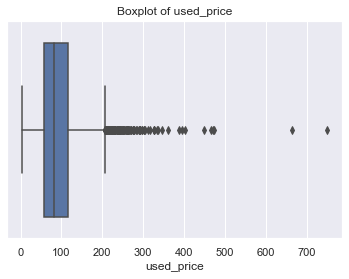

<IPython.core.display.Javascript object>

In [80]:
sns.boxplot(df1["used_price"])
plt.title("Boxplot of used_price")
plt.show()

In [81]:
from scipy import stats

z = np.abs(stats.zscore(df1.used_price))
print(z)

[0.32989039 1.50340936 1.34470743 ... 0.26059543 0.27138277 0.54837979]


<IPython.core.display.Javascript object>

In [82]:
threshold = 3
print(np.where(z > 3))

(array([  34,   44,  118,  120,  121,  137,  157,  198,  210,  263,  303,
        328,  352,  367,  388,  389,  644,  645,  646,  647,  653,  662,
        810,  996, 1035, 1080, 1262, 1272, 1324, 1633, 2135, 2355, 2356,
       2358, 2380, 2581, 2927, 3207, 3213, 3252, 3334, 3348, 3364, 3391,
       3394, 3395, 3420, 3421, 3436, 3437, 3448], dtype=int64),)


<IPython.core.display.Javascript object>

In [83]:
quartiles = np.quantile(df1["used_price"][df1["used_price"].notnull()], [0.25, 0.75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")
outlier_powers = df1.loc[
    np.abs(df1["used_price"] - df1["used_price"].median()) > power_4iqr, "used_price"
]
outlier_powers

Q1 = 56.4825, Q3 = 116.245, 4*IQR = 239.05


34      470.34
198     749.52
263     401.80
303     326.72
388     346.33
644     332.96
645     472.94
996     337.21
1262    360.61
1272    449.93
1324    327.04
2135    465.61
2358    394.91
3207    665.44
3348    387.32
3394    327.68
Name: used_price, dtype: float64

<IPython.core.display.Javascript object>

#### Observations: 
There are too many values to be imputated so leave the outliers in the data. And its also not unrealistic to see prices for used phone that high Change categorical variables to numeric

In [84]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   object 
 1   os                3454 non-null   object 
 2   screen_size       3454 non-null   float64
 3   4g                3454 non-null   object 
 4   5g                3454 non-null   object 
 5   main_camera_mp    3454 non-null   float64
 6   selfie_camera_mp  3454 non-null   float64
 7   int_memory        3454 non-null   float64
 8   ram               3454 non-null   float64
 9   battery           3454 non-null   float64
 10  weight            3454 non-null   float64
 11  release_year      3454 non-null   int64  
 12  days_used         3454 non-null   int64  
 13  new_price         3454 non-null   float64
 14  used_price        3454 non-null   float64
 15  used_price_log    3454 non-null   float64
 16  new_price_log     3454 non-null   float64


<IPython.core.display.Javascript object>

In [85]:
# The categorical variables are brand name, 4g, 5g
labels = df1["brand_name"].astype("category").cat.categories.tolist()
replace_labels = {
    "brand_name": {k: v for k, v in zip(labels, list(range(1, len(labels) + 1)))}
}
print(replace_labels)
df1.replace(replace_labels, inplace=True)

{'brand_name': {'Acer': 1, 'Alcatel': 2, 'Apple': 3, 'Asus': 4, 'BlackBerry': 5, 'Celkon': 6, 'Coolpad': 7, 'Gionee': 8, 'Google': 9, 'HTC': 10, 'Honor': 11, 'Huawei': 12, 'Infinix': 13, 'Karbonn': 14, 'LG': 15, 'Lava': 16, 'Lenovo': 17, 'Meizu': 18, 'Micromax': 19, 'Microsoft': 20, 'Motorola': 21, 'Nokia': 22, 'OnePlus': 23, 'Oppo': 24, 'Others': 25, 'Panasonic': 26, 'Realme': 27, 'Samsung': 28, 'Sony': 29, 'Spice': 30, 'Vivo': 31, 'XOLO': 32, 'Xiaomi': 33, 'ZTE': 34}}


<IPython.core.display.Javascript object>

In [148]:
# perform one hot coding to assign numerical values to the different os from sklearn.preprocessing import LabelEncoder
df1 = pd.get_dummies(df1, columns=["os"], prefix=["os"])

KeyError: "None of [Index(['os'], dtype='object')] are in the [columns]"

<IPython.core.display.Javascript object>

In [87]:
df1 = pd.get_dummies(df1, columns=["4g"], prefix=["4g"])

<IPython.core.display.Javascript object>

In [88]:
df1 = pd.get_dummies(df1, columns=["5g"], prefix=["5g"])

<IPython.core.display.Javascript object>

In [89]:
# confirm data type changes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   int64  
 1   screen_size       3454 non-null   float64
 2   main_camera_mp    3454 non-null   float64
 3   selfie_camera_mp  3454 non-null   float64
 4   int_memory        3454 non-null   float64
 5   ram               3454 non-null   float64
 6   battery           3454 non-null   float64
 7   weight            3454 non-null   float64
 8   release_year      3454 non-null   int64  
 9   days_used         3454 non-null   int64  
 10  new_price         3454 non-null   float64
 11  used_price        3454 non-null   float64
 12  used_price_log    3454 non-null   float64
 13  new_price_log     3454 non-null   float64
 14  os_Android        3454 non-null   uint8  
 15  os_Others         3454 non-null   uint8  
 16  os_Windows        3454 non-null   uint8  


<IPython.core.display.Javascript object>

In [90]:
# check the stats of the new processed data
df1.describe().T

count         mean          std          min          25%  \
brand_name        3454.0    19.813550     9.200693     1.000000    12.000000   
screen_size       3454.0    13.713115     3.805280     5.080000    12.700000   
main_camera_mp    3454.0     9.384534     4.700148     0.080000     5.000000   
selfie_camera_mp  3454.0     6.551013     6.969634     0.000000     2.000000   
int_memory        3454.0    40.557380    34.384990     0.010000    16.000000   
ram               3454.0     4.036080     1.364314     0.020000     4.000000   
battery           3454.0  3133.170961  1298.565062   500.000000  2100.000000   
weight            3454.0   182.705761    88.329494    69.000000   142.000000   
release_year      3454.0  2015.965258     2.298455  2013.000000  2014.000000   
days_used         3454.0   674.869716   248.580166    91.000000   533.500000   
new_price         3454.0   237.038848   194.302782    18.200000   120.342500   
used_price        3454.0    92.302936    54.701648     4.650000    56.482500   
used_price_log    3454.0     4.364712     0.588914     1.536867     4.033931   
new_price_log     3454.0     5.233107     0.683637     2.901422     4.790342   
os_Android        3454.0     0.930515     0.254313     0.000000     1.000000   
os_Others         3454.0     0.039664     0.195197     0.000000     0.000000   
os_Windows        3454.0     0.019398     0.137939     0.000000     0.000000   
os_iOS            3454.0     0.010423     0.101573     0.000000     0.000000   
4g_no             3454.0     0.323972     0.468057     0.000000     0.000000   
4g_yes            3454.0     0.676028     0.468057     0.000000     0.000000   
5g_no             3454.0     0.955993     0.205140     0.000000     1.000000   
5g_yes            3454.0     0.044007     0.205140     0.000000     0.000000   

                          50%          75%          max  
brand_name          22.000000    28.000000    34.000000  
screen_size         12.830000    15.340000    30.710000  
main_camera_mp       8.000000    13.000000    48.000000  
selfie_camera_mp     5.000000     8.000000    32.000000  
int_memory          32.000000    64.000000   128.000000  
ram                  4.000000     4.000000    12.000000  
battery           3000.000000  4000.000000  9720.000000  
weight             160.000000   185.000000   855.000000  
release_year      2015.500000  2018.000000  2020.000000  
days_used          690.500000   868.750000  1094.000000  
new_price          189.785000   291.115000  2560.200000  
used_price          81.870000   116.245000   749.520000  
used_price_log       4.405133     4.755700     6.619433  
new_price_log        5.245892     5.673718     7.847841  
os_Android           1.000000     1.000000     1.000000  
os_Others            0.000000     0.000000     1.000000  
os_Windows           0.000000     0.000000     1.000000  
os_iOS               0.000000     0.000000     1.000000  
4g_no                0.000000     1.000000     1.000000  
4g_yes               1.000000     1.000000     1.000000  
5g_no                1.000000     1.000000     1.000000  
5g_yes               0.000000     0.000000     1.000000

<IPython.core.display.Javascript object>

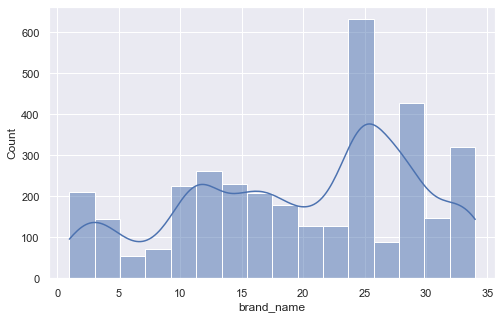

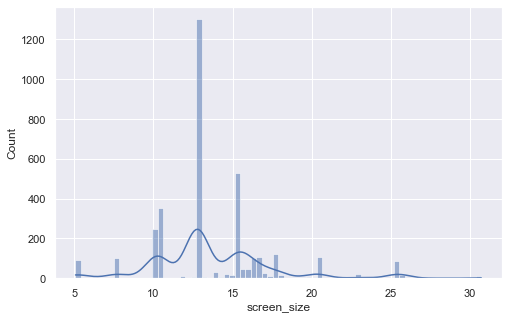

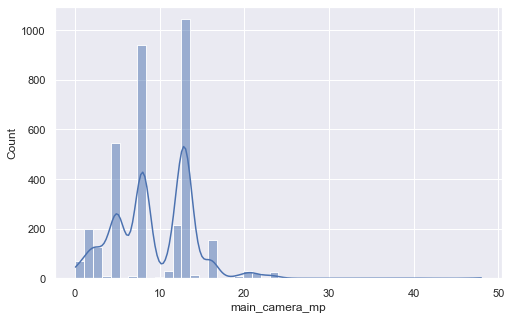

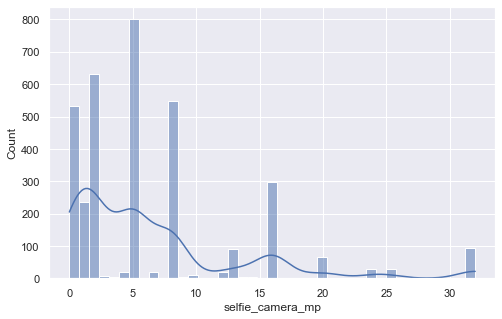

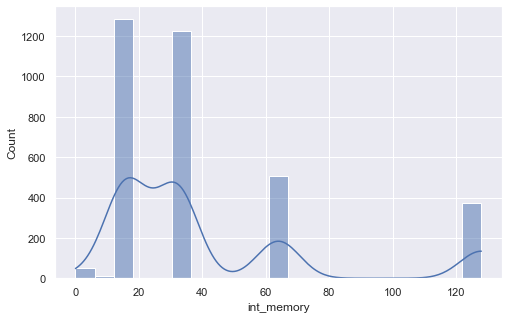

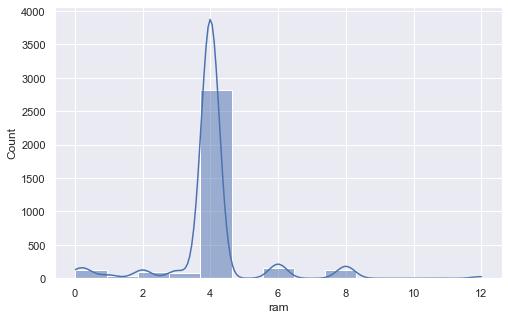

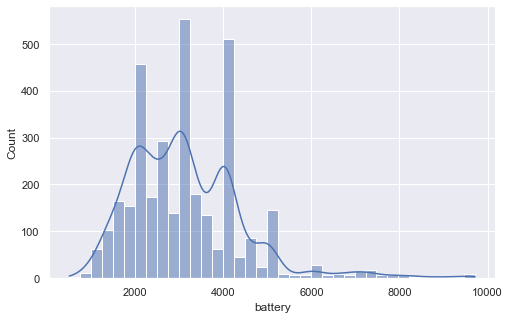

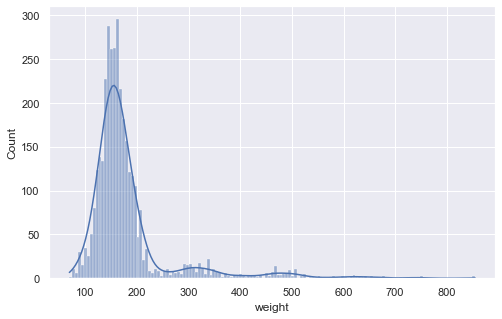

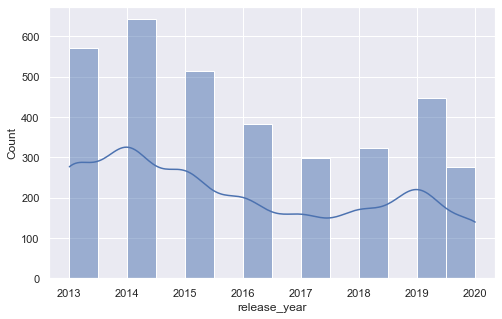

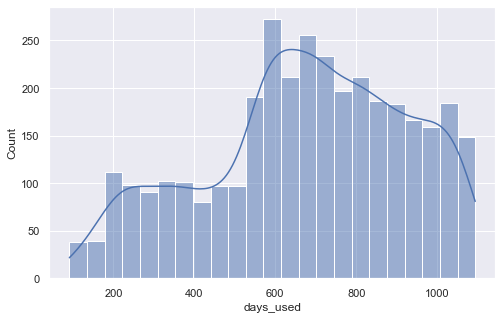

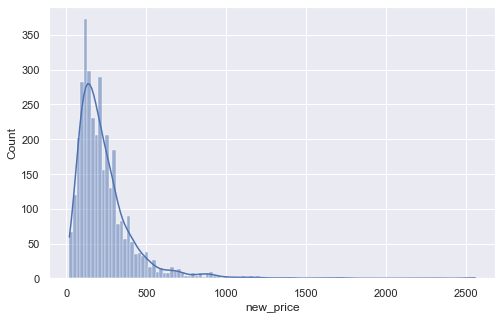

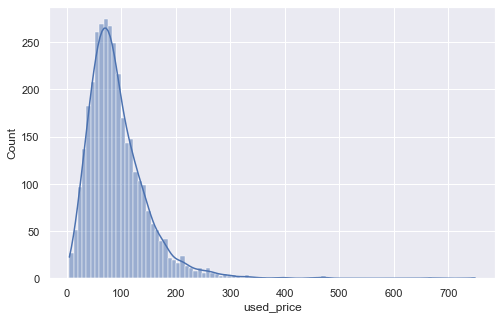

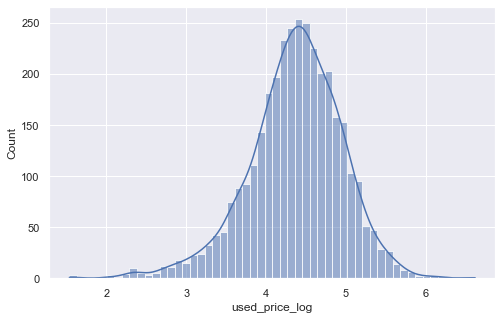

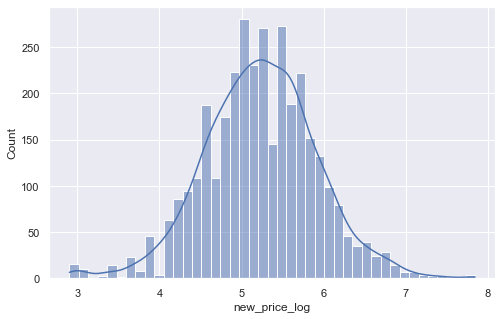

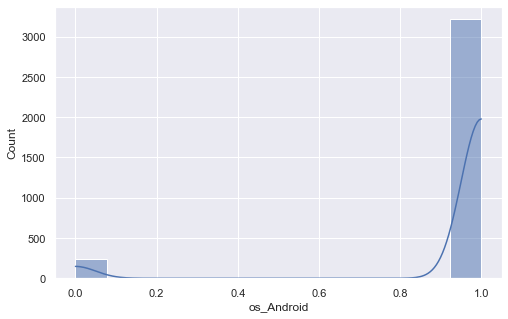

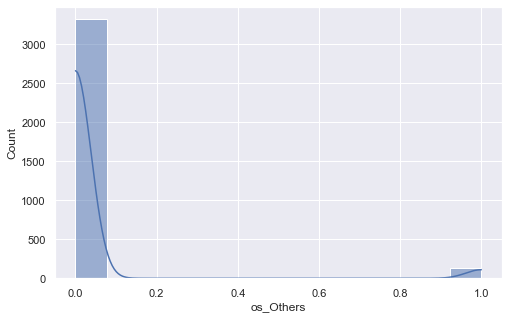

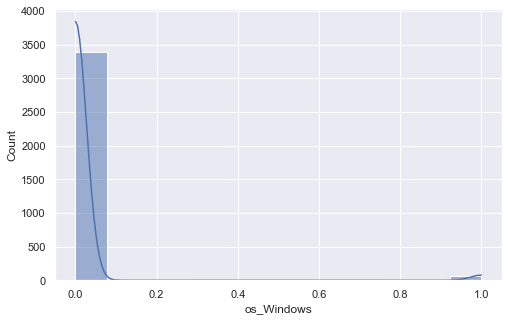

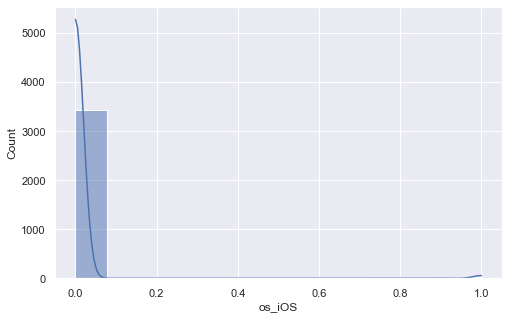

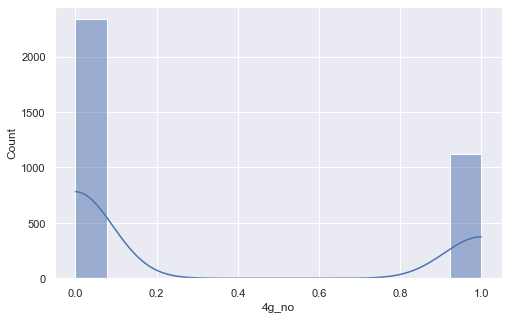

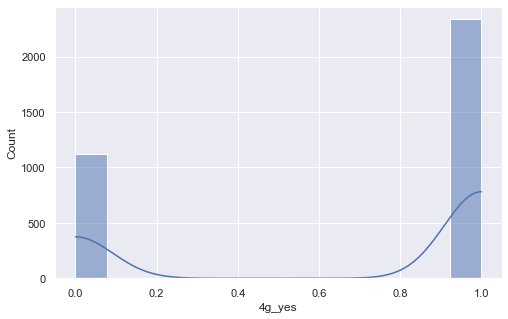

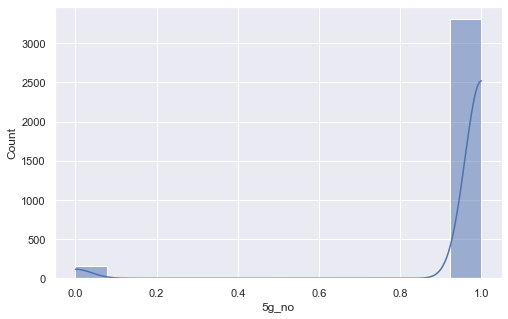

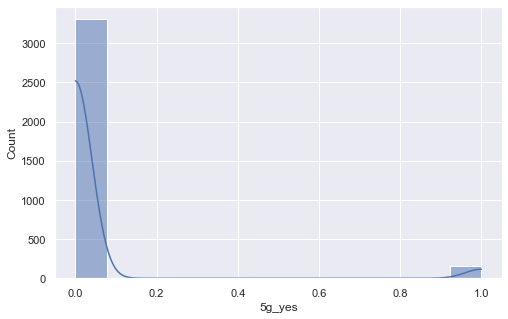

<IPython.core.display.Javascript object>

In [91]:
for i in df1.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df1, x=i, kde=True)
    plt.show

#### Observations: 
The distributions are still not normal, this will be addressed with a scale transformation technique

<AxesSubplot:>

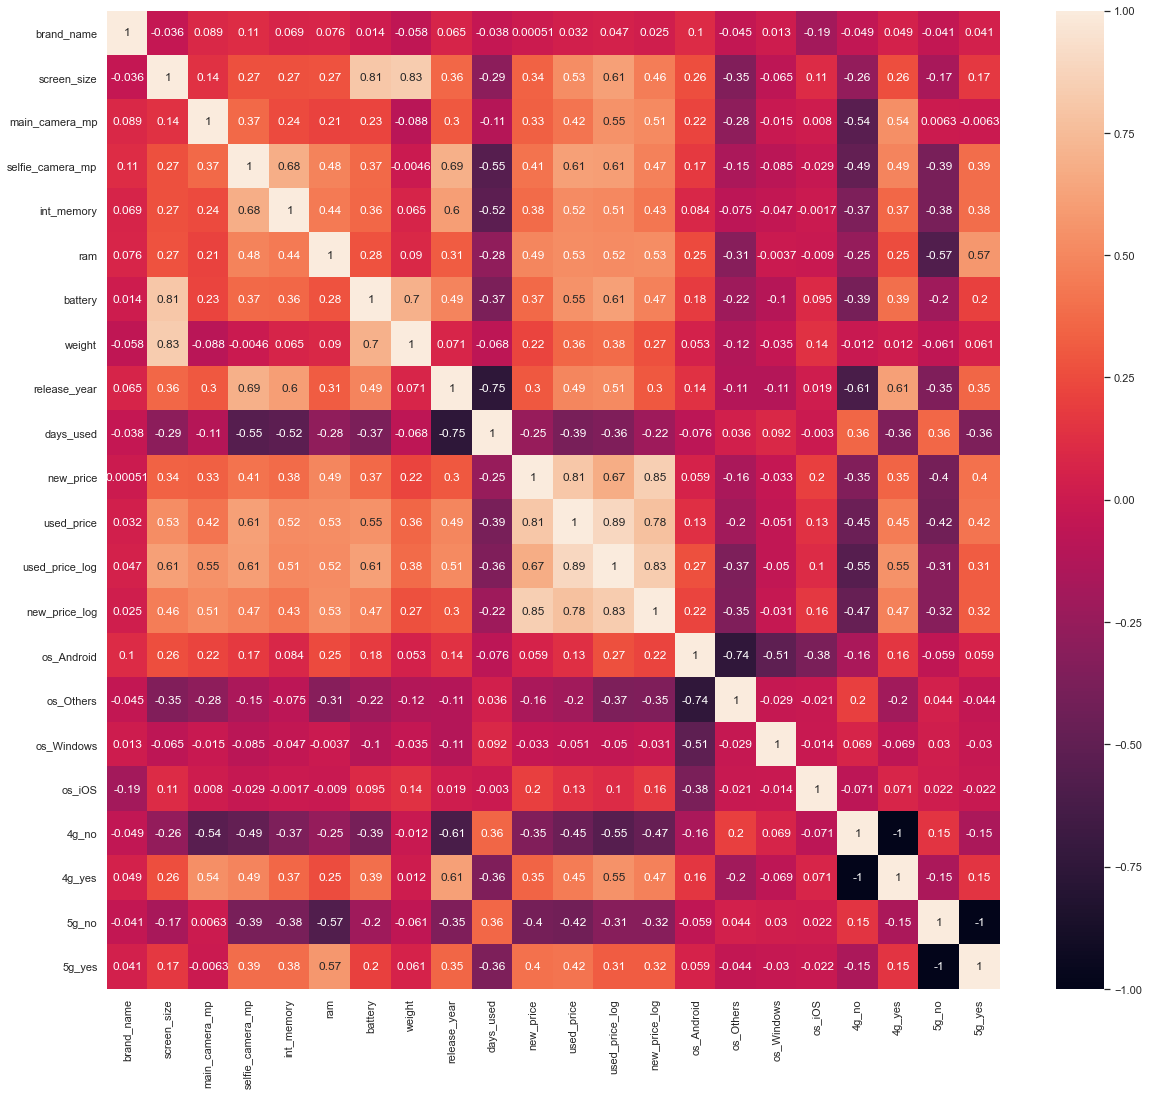

<IPython.core.display.Javascript object>

In [92]:
plt.figure(figsize=(20, 18))
sns.heatmap(df1.corr(), annot=True)

**Everyone likes a good camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze.**

## Building a Linear Regression model

In [93]:
# independant variables
X = df1.drop(["brand_name", "used_price"], axis=1)
# the dependent variable
y = df1[["used_price"]]

<IPython.core.display.Javascript object>

In [95]:
from sklearn.model_selection import (
    train_test_split,
)  # Sklearn package's randomized data splitting function

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [96]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


<IPython.core.display.Javascript object>

In [97]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

In [98]:
for idx, col_name in enumerate(X_train.columns):
    print(
        "The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx])
    )

The coefficient for screen_size is -0.3059341059110507
The coefficient for main_camera_mp is 0.04396082919826641
The coefficient for selfie_camera_mp is 0.8055252804947384
The coefficient for int_memory is 0.05681726218785161
The coefficient for ram is 0.40584979184844305
The coefficient for battery is 0.0004552755717405349
The coefficient for weight is 0.028983764003135952
The coefficient for release_year is -1.6347023365159261
The coefficient for days_used is -0.0017769354426118477
The coefficient for new_price is 0.17439798384654498
The coefficient for used_price_log is 80.11228994775131
The coefficient for new_price_log is -41.220745605019395
The coefficient for os_Android is -4.625417816878467
The coefficient for os_Others is 7.353194314499861
The coefficient for os_Windows is -4.097714692951276
The coefficient for os_iOS is 1.369938195329868
The coefficient for 4g_no is 1.148426873530596
The coefficient for 4g_yes is -1.1484268735306027
The coefficient for 5g_no is -2.71519069710

<IPython.core.display.Javascript object>

## Model performance evaluation

In [99]:
intercept = regression_model.intercept_[0]
print("The intercept for the model is {}".format(intercept))

The intercept for the model is 3208.3953246569217


<IPython.core.display.Javascript object>

In [100]:
# get the score (R-squared) on the training set
print(
    "The score (R-squared) on the training set is ",
    regression_model.score(X_train, y_train),
)

The score (R-squared) on the training set is  0.9317073383610885


<IPython.core.display.Javascript object>

In [101]:
def r_squared(model, X, y):
    y_mean = y.mean()
    SST = ((y - y_mean) ** 2).sum()
    SSE = ((y - model.predict(X)) ** 2).sum()
    r_square = 1 - SSE / SST
    return SSE, SST, r_square


SSE, SST, r_square = r_squared(regression_model, X_train, y_train)
print("SSE: ", SSE)
print("SST: ", SST)
print("R-squared: ", r_square)

SSE:  used_price    507842.845761
dtype: float64
SST:  used_price    7.436273e+06
dtype: float64
R-squared:  used_price    0.931707
dtype: float64


<IPython.core.display.Javascript object>

In [102]:
# get the score (R-squared) on the test set
print(
    "The score (R-squared) on the test set is ", regression_model.score(X_test, y_test)
)

The score (R-squared) on the test set is  0.935144683103324


<IPython.core.display.Javascript object>

In [103]:
from sklearn.metrics import mean_squared_error

print(
    "The Root Mean Square Error (RMSE) of the model for the training set is ",
    np.sqrt(mean_squared_error(y_train, regression_model.predict(X_train))),
)

The Root Mean Square Error (RMSE) of the model for the training set is  14.495271164196351


<IPython.core.display.Javascript object>

In [104]:
print(
    "The Root Mean Square Error (RMSE) of the model for the test set is ",
    np.sqrt(mean_squared_error(y_test, regression_model.predict(X_test))),
)

The Root Mean Square Error (RMSE) of the model for the test set is  13.45743084739643


<IPython.core.display.Javascript object>

In [105]:
import statsmodels.api as sm

# this adds the constant term to the dataset
X_con = sm.add_constant(X)
X_trainc, X_testc, y_trainc, y_testc = train_test_split(
    X_con, y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [106]:
model = sm.OLS(y_trainc, X_trainc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             used_price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     1925.
Date:                Tue, 01 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:47:02   Log-Likelihood:                -9892.2
No. Observations:                2417   AIC:                         1.982e+04
Df Residuals:                    2399   BIC:                         1.992e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1425.9535    259.440      5.496      0.000     917.203    1934.704
screen_size         -0.3059      0.211     -1.451      0.147      -0.719       0.107
main_camera_mp       0.0440      0.091      0.482      0.630      -0.135       0.223
selfie_camera_mp     0.8055      0.073     11.092      0.000       0.663       0.948
int_memory           0.0568      0.013      4.403      0.000       0.032       0.082
ram                  0.4058      0.312      1.300      0.194      -0.207       1.018
battery              0.0005      0.000      1.028      0.304      -0.000       0.001
weight               0.0290      0.008      3.498      0.000       0.013       0.045
release_year        -1.6347      0.289     -5.661      0.000      -2.201      -1.068
days_used           -0.0018      0.002     -0.929      0.353      -0.006       0.002
new_price            0.1744      0.003     55.214      0.000       0.168       0.181
used_price_log      80.1123      1.274     62.883      0.000      77.614      82.611
new_price_log      -41.2207      1.282    -32.147      0.000     -43.735     -38.706
os_Android         351.8630     64.848      5.426      0.000     224.700     479.026
os_Others          363.8416     64.832      5.612      0.000     236.710     490.973
os_Windows         352.3907     64.838      5.435      0.000     225.247     479.535
os_iOS             357.8583     65.017      5.504      0.000     230.362     485.354
4g_no              714.1252    129.520      5.514      0.000     460.143     968.108
4g_yes             711.8283    129.922      5.479      0.000     457.058     966.599
5g_no              710.2615    129.631      5.479      0.000     456.061     964.462
5g_yes             715.6919    129.817      5.513      0.000     461.128     970.256
==============================================================================
Omnibus:                     1187.355   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           101177.723
Skew:                           1.416   Prob(JB):                         0.00
Kurtosis:                      34.570   Cond. No.                     6.36e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.38e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<IPython.core.display.Javascript object>

In [107]:
y_pred = model.predict(X_testc)

<IPython.core.display.Javascript object>

In [108]:
print(y_pred)

866      56.874418
957     -13.001292
280      90.257735
2150    113.452458
93       87.182131
           ...    
2191    108.109201
3217     62.252334
885     -72.915470
2991     68.974245
1071     42.204630
Length: 1037, dtype: float64


<IPython.core.display.Javascript object>

In [109]:
# save the model to the working directory for future use
import pickle

used_price_model = "Rest_model.sav"
pickle.dump(regression_model, open(used_price_model, "wb"))

<IPython.core.display.Javascript object>

## Checking Linear Regression Assumptions

In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

#### check for multicolinearity

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# we will define a function to check VIF
def checking_vif(X):
    vif = pd.DataFrame()
    vif["feature"] = X.columns
# calculating VIF for each feature
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif


<IPython.core.display.Javascript object>

In [111]:
checking_vif(X_trainc)
# vif.round(1)

feature       VIF
0              const  0.000000
1        screen_size  7.489039
2     main_camera_mp  2.092602
3   selfie_camera_mp  2.989070
4         int_memory  2.235302
5                ram  2.123995
6            battery  3.854607
7             weight  6.281223
8       release_year  5.012968
9          days_used  2.601026
10         new_price  4.554854
11    used_price_log  6.313537
12     new_price_log  8.687767
13        os_Android       inf
14         os_Others       inf
15        os_Windows       inf
16            os_iOS       inf
17             4g_no       inf
18            4g_yes       inf
19             5g_no       inf
20            5g_yes       inf

<IPython.core.display.Javascript object>

#### Observations: 
There are presence of multicolinearity in the variables with VIF > 5

#### Assumption of Homoscedasticity

In [116]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 1006.5832409468018),
 ('p-value', 1.5404983029156296e-200),
 ('f-value', 100.71254302636926),
 ('f p-value', 3.231250213551663e-265)]

<IPython.core.display.Javascript object>

#### Observations: 
Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied

#### Assumption of Normality of the Residuals

In [117]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(model.resid)
lzip(name, test)

[('Jarque-Bera', 101177.72318273672),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', 1.4159968042701465),
 ('Kurtosis', 34.56961666065857)]

<IPython.core.display.Javascript object>

#### Observations: 
The data violates the assumption. There are skewness present in the variable(s) used

Text(0.5, 1.0, 'Model1 Residuals Q-Q Plot')

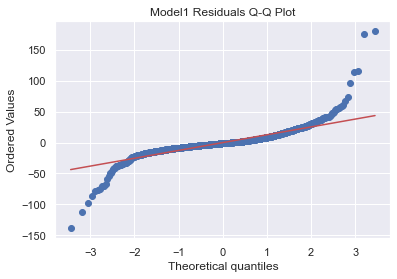

<IPython.core.display.Javascript object>

In [118]:
from scipy import stats

# plot the normality
stats.probplot(model.resid, dist="norm", plot=plt)
plt.title("Model1 Residuals Q-Q Plot")

#### Observations: 
Although the R-square is high, this model violates several linear assumptions hence not the best of the dataset. The Root mean square error is also high which indicatedlow predictive power

### model 2

In [119]:
df3 = df.copy()

<IPython.core.display.Javascript object>

In [120]:
df3.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
used_price_log        0
new_price_log         0
dtype: int64

<IPython.core.display.Javascript object>

In [121]:
# advanced missing value imputation
from sklearn.impute import KNNImputer

<IPython.core.display.Javascript object>

In [122]:
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
df3["main_camera_mp"] = knn_imputer.fit_transform(df3[["main_camera_mp"]])

<IPython.core.display.Javascript object>

In [123]:
df3["main_camera_mp"].isnull().sum()

0

<IPython.core.display.Javascript object>

In [124]:
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
df3["selfie_camera_mp"] = knn_imputer.fit_transform(df3[["selfie_camera_mp"]])
df3["selfie_camera_mp"].isnull().sum()

0

<IPython.core.display.Javascript object>

In [125]:
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
df3["int_memory"] = knn_imputer.fit_transform(df3[["int_memory"]])
df3["int_memory"].isnull().sum()

0

<IPython.core.display.Javascript object>

In [126]:
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
df3["ram"] = knn_imputer.fit_transform(df3[["ram"]])
df3["ram"].isnull().sum()

0

<IPython.core.display.Javascript object>

In [127]:
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
df3["battery"] = knn_imputer.fit_transform(df3[["battery"]])
df3["battery"].isnull().sum()

0

<IPython.core.display.Javascript object>

In [128]:
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
df3["weight"] = knn_imputer.fit_transform(df3[["weight"]])
df3["weight"].isnull().sum()

0

<IPython.core.display.Javascript object>

In [129]:
# confirm no more missing values
df3.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
used_price_log      0
new_price_log       0
dtype: int64

<IPython.core.display.Javascript object>

In [130]:
# need to drop colums that wont be used due to multicolinearity
df3.drop(["brand_name", "os", "4g", "5g"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [132]:
# using these due to multicolinearity and log transforming y for better distribution
X = df3.drop(["used_price"], axis=1)
y = np.log(df3[["used_price"]])

<IPython.core.display.Javascript object>

In [133]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

<IPython.core.display.Javascript object>

In [134]:
lreg = LinearRegression()
lreg.fit(x_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

In [135]:
# get the score (R-squared) on the training set
print(
    "The score (R-squared) on the training set is ", lreg.score(x_train, y_train),
)

The score (R-squared) on the training set is  1.0


<IPython.core.display.Javascript object>

In [136]:
def r_squared(model, x, y):
    y_mean = y.mean()
    SST = ((y - y_mean) ** 2).sum()
    SSE = ((y - model.predict(x)) ** 2).sum()
    r_square = 1 - SSE / SST
    return SSE, SST, r_square


SSE, SST, r_square = r_squared(lreg, x_train, y_train)
print("SSE: ", SSE)
print("SST: ", SST)
print("R-squared: ", r_square)

SSE:  used_price    6.567213e-26
dtype: float64
SST:  used_price    844.354864
dtype: float64
R-squared:  used_price    1.0
dtype: float64


<IPython.core.display.Javascript object>

In [137]:
# get the score (R-squared) on the test set
print("The score (R-squared) on the test set is ", lreg.score(x_test, y_test))

The score (R-squared) on the test set is  1.0


<IPython.core.display.Javascript object>

In [138]:
print(
    "The Root Mean Square Error (RMSE) of the model for the training set is ",
    np.sqrt(mean_squared_error(y_train, lreg.predict(x_train))),
)

The Root Mean Square Error (RMSE) of the model for the training set is  5.212573831477538e-15


<IPython.core.display.Javascript object>

In [139]:
print(
    "The Root Mean Square Error (RMSE) of the model for the test set is ",
    np.sqrt(mean_squared_error(y_test, lreg.predict(x_test))),
)

The Root Mean Square Error (RMSE) of the model for the test set is  5.2968054604008015e-15


<IPython.core.display.Javascript object>

In [140]:
import statsmodels.api as sm

# this adds the constant term to the dataset
X_con = sm.add_constant(X)
X_trainc, X_testc, y_trainc, y_testc = train_test_split(
    X_con, y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [141]:
model2 = sm.OLS(y_trainc, X_trainc).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             used_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.745e+28
Date:                Tue, 01 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:58:57   Log-Likelihood:                 71263.
No. Observations:                2417   AIC:                        -1.425e+05
Df Residuals:                    2404   BIC:                        -1.424e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.492e-13   1.36e-12     -0.110      0.913   -2.81e-12    2.52e-12
screen_size       1.874e-16   5.15e-16      0.364      0.716   -8.23e-16     1.2e-15
main_camera_mp   -6.245e-17   2.33e-16     -0.268      0.789    -5.2e-16    3.95e-16
selfie_camera_mp  -1.37e-16   1.82e-16     -0.752      0.452   -4.94e-16     2.2e-16
int_memory        2.927e-18   1.16e-17      0.251      0.801   -1.99e-17    2.58e-17
ram               2.099e-16   7.13e-16      0.295      0.768   -1.19e-15    1.61e-15
battery          -1.592e-17   1.14e-18    -13.905      0.000   -1.82e-17   -1.37e-17
weight            4.608e-18   2.08e-17      0.221      0.825   -3.62e-17    4.54e-17
release_year       7.98e-17   6.73e-16      0.119      0.906   -1.24e-15     1.4e-15
days_used         5.421e-20   4.91e-18      0.011      0.991   -9.57e-18    9.68e-18
new_price        -4.147e-18   8.45e-18     -0.491      0.623   -2.07e-17    1.24e-17
used_price_log       1.0000   3.33e-15      3e+14      0.000       1.000       1.000
new_price_log     8.327e-16   3.24e-15      0.257      0.797   -5.51e-15    7.18e-15
==============================================================================
Omnibus:                      527.500   Durbin-Watson:                   0.571
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1274.195
Skew:                           1.193   Prob(JB):                    2.05e-277
Kurtosis:                       5.637   Cond. No.                     6.96e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.96e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<IPython.core.display.Javascript object>

#### check for linear assumption

In [142]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# we will define a function to check VIF
def checking_vif(X):
    vif = pd.DataFrame()
    vif["feature"] = X.columns
    # calculating VIF for each feature
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif

<IPython.core.display.Javascript object>

In [143]:
checking_vif(X_trainc)

feature           VIF
0              const  3.085532e+06
1        screen_size  6.544203e+00
2     main_camera_mp  1.999665e+00
3   selfie_camera_mp  2.752082e+00
4         int_memory  1.416983e+00
5                ram  1.619059e+00
6            battery  3.768497e+00
7             weight  5.797039e+00
8       release_year  3.983300e+00
9          days_used  2.508158e+00
10         new_price  4.766121e+00
11    used_price_log  6.311319e+00
12     new_price_log  8.094720e+00

<IPython.core.display.Javascript object>

#### Observations: 
The VIF for the predictors are all less than 5 so no multicollinearity between the variables.

### check for normality

In [144]:
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(model2.resid)
lzip(name, test)

[('Jarque-Bera', 1274.19468395775),
 ('Chi^2 two-tail prob.', 2.0518232343130194e-277),
 ('Skew', 1.1934660358399727),
 ('Kurtosis', 5.637210928400881)]

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Model2 Residuals Q-Q Plot')

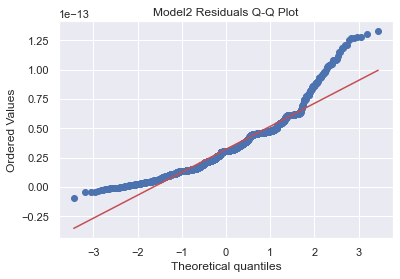

<IPython.core.display.Javascript object>

In [145]:
from scipy import stats

# plot the normality
stats.probplot(model2.resid, dist="norm", plot=plt)
plt.title("Model2 Residuals Q-Q Plot")

#### Observations: 
The line falls along the values so normality is present

#### TEST FOR LINEARITY AND INDEPENDENCE¶
Checking heteroscedasticity : Using Bruesch-Pagan we test for heteroscedasticity.¶
Null Hypothesis: Error terms are homoscedastic
Alternative Hypothesis: Error terms are heteroscedastic

In [146]:
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(model2.resid, model.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 2202.2148626212047),
 ('p-value', 0.0),
 ('f-value', 1446.8942475428275),
 ('f p-value', 0.0)]

<IPython.core.display.Javascript object>

#### Observations:
p-value is less than 0.05 so we reject the null hyothesis. Therefore this assumption is not satisfied.

## Final Model Summary

The last model is the preferred and final model. The performance metrics is better with high adjusted R-square that indicates that the linear line fits majority of the data and low RMSE that shows a high predictive power. The model also met certian linear assumptions with limitation.

## Actionable Insights and Recommendations

- Screen_size, int_memory, ram, new_price, main_camera_mp, selfie_camera_mp,battery, day_used and released year are statistically strong predictors to use in determine prices for used phones.
- There is a positive linear relation between screen-size, both camera, ram, weight , new price and used price.
- While a negative linear relationship exist between released year, days used, int memory and used price.
- The linear model 2 needs more fine tuning. Based on the data, a multiple linear regression may not be the best predictive model to use. Recommend a more robust model.